In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:

from IPython.display import display, Markdown

import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt


from util import (
  draw_graphs as _draw_graphs,
  plot_distance_heatmap,
  plot_max_match_results
)
from pipeline import make_pipeline

from mcopt import ot, MorseGraph

In [11]:
pipeline = make_pipeline()

navier_stokes = pipeline.dataset('navier_stokes')

display(Markdown(navier_stokes.display_description()))


# Navier Stokes


TODO
 


In [12]:
graphs = pipeline.graph('navier_stokes').build().frames
nets = pipeline.mm_network('navier_stokes').build().frames
attributes = pipeline.attributes('navier_stokes').build()

> [graph:navier_stokes] config unchanged, loading


> [mmnetwork:navier_stokes] config unchanged, loading


> [attributes:navier_stokes] config unchanged, loading


In [13]:
src_t = 1

src_graph = graphs[src_t]
dest_graphs = graphs.copy()
dest_graphs.pop(src_t)

src_net = nets[src_t]
dest_nets = nets.copy()
dest_nets.pop(src_t)

In [55]:
def draw_graphs(
  couplings = None,
  dest_title_fmt: str = 'Navier Stokes {t}',
  **kwargs
):
  fig = _draw_graphs(
    src_graph, dest_graphs,
    width=3,
    height=3,
    src_title=f'Navier Stokes {src_t}',
    dest_title_fmt=dest_title_fmt,
    couplings=couplings,
    figsize=(3 * 12, 4 * 6),
    fontsize=50,
    **kwargs
  )
  fig.subplots_adjust(top=0.9)
  
  return fig

# Initial Graphs

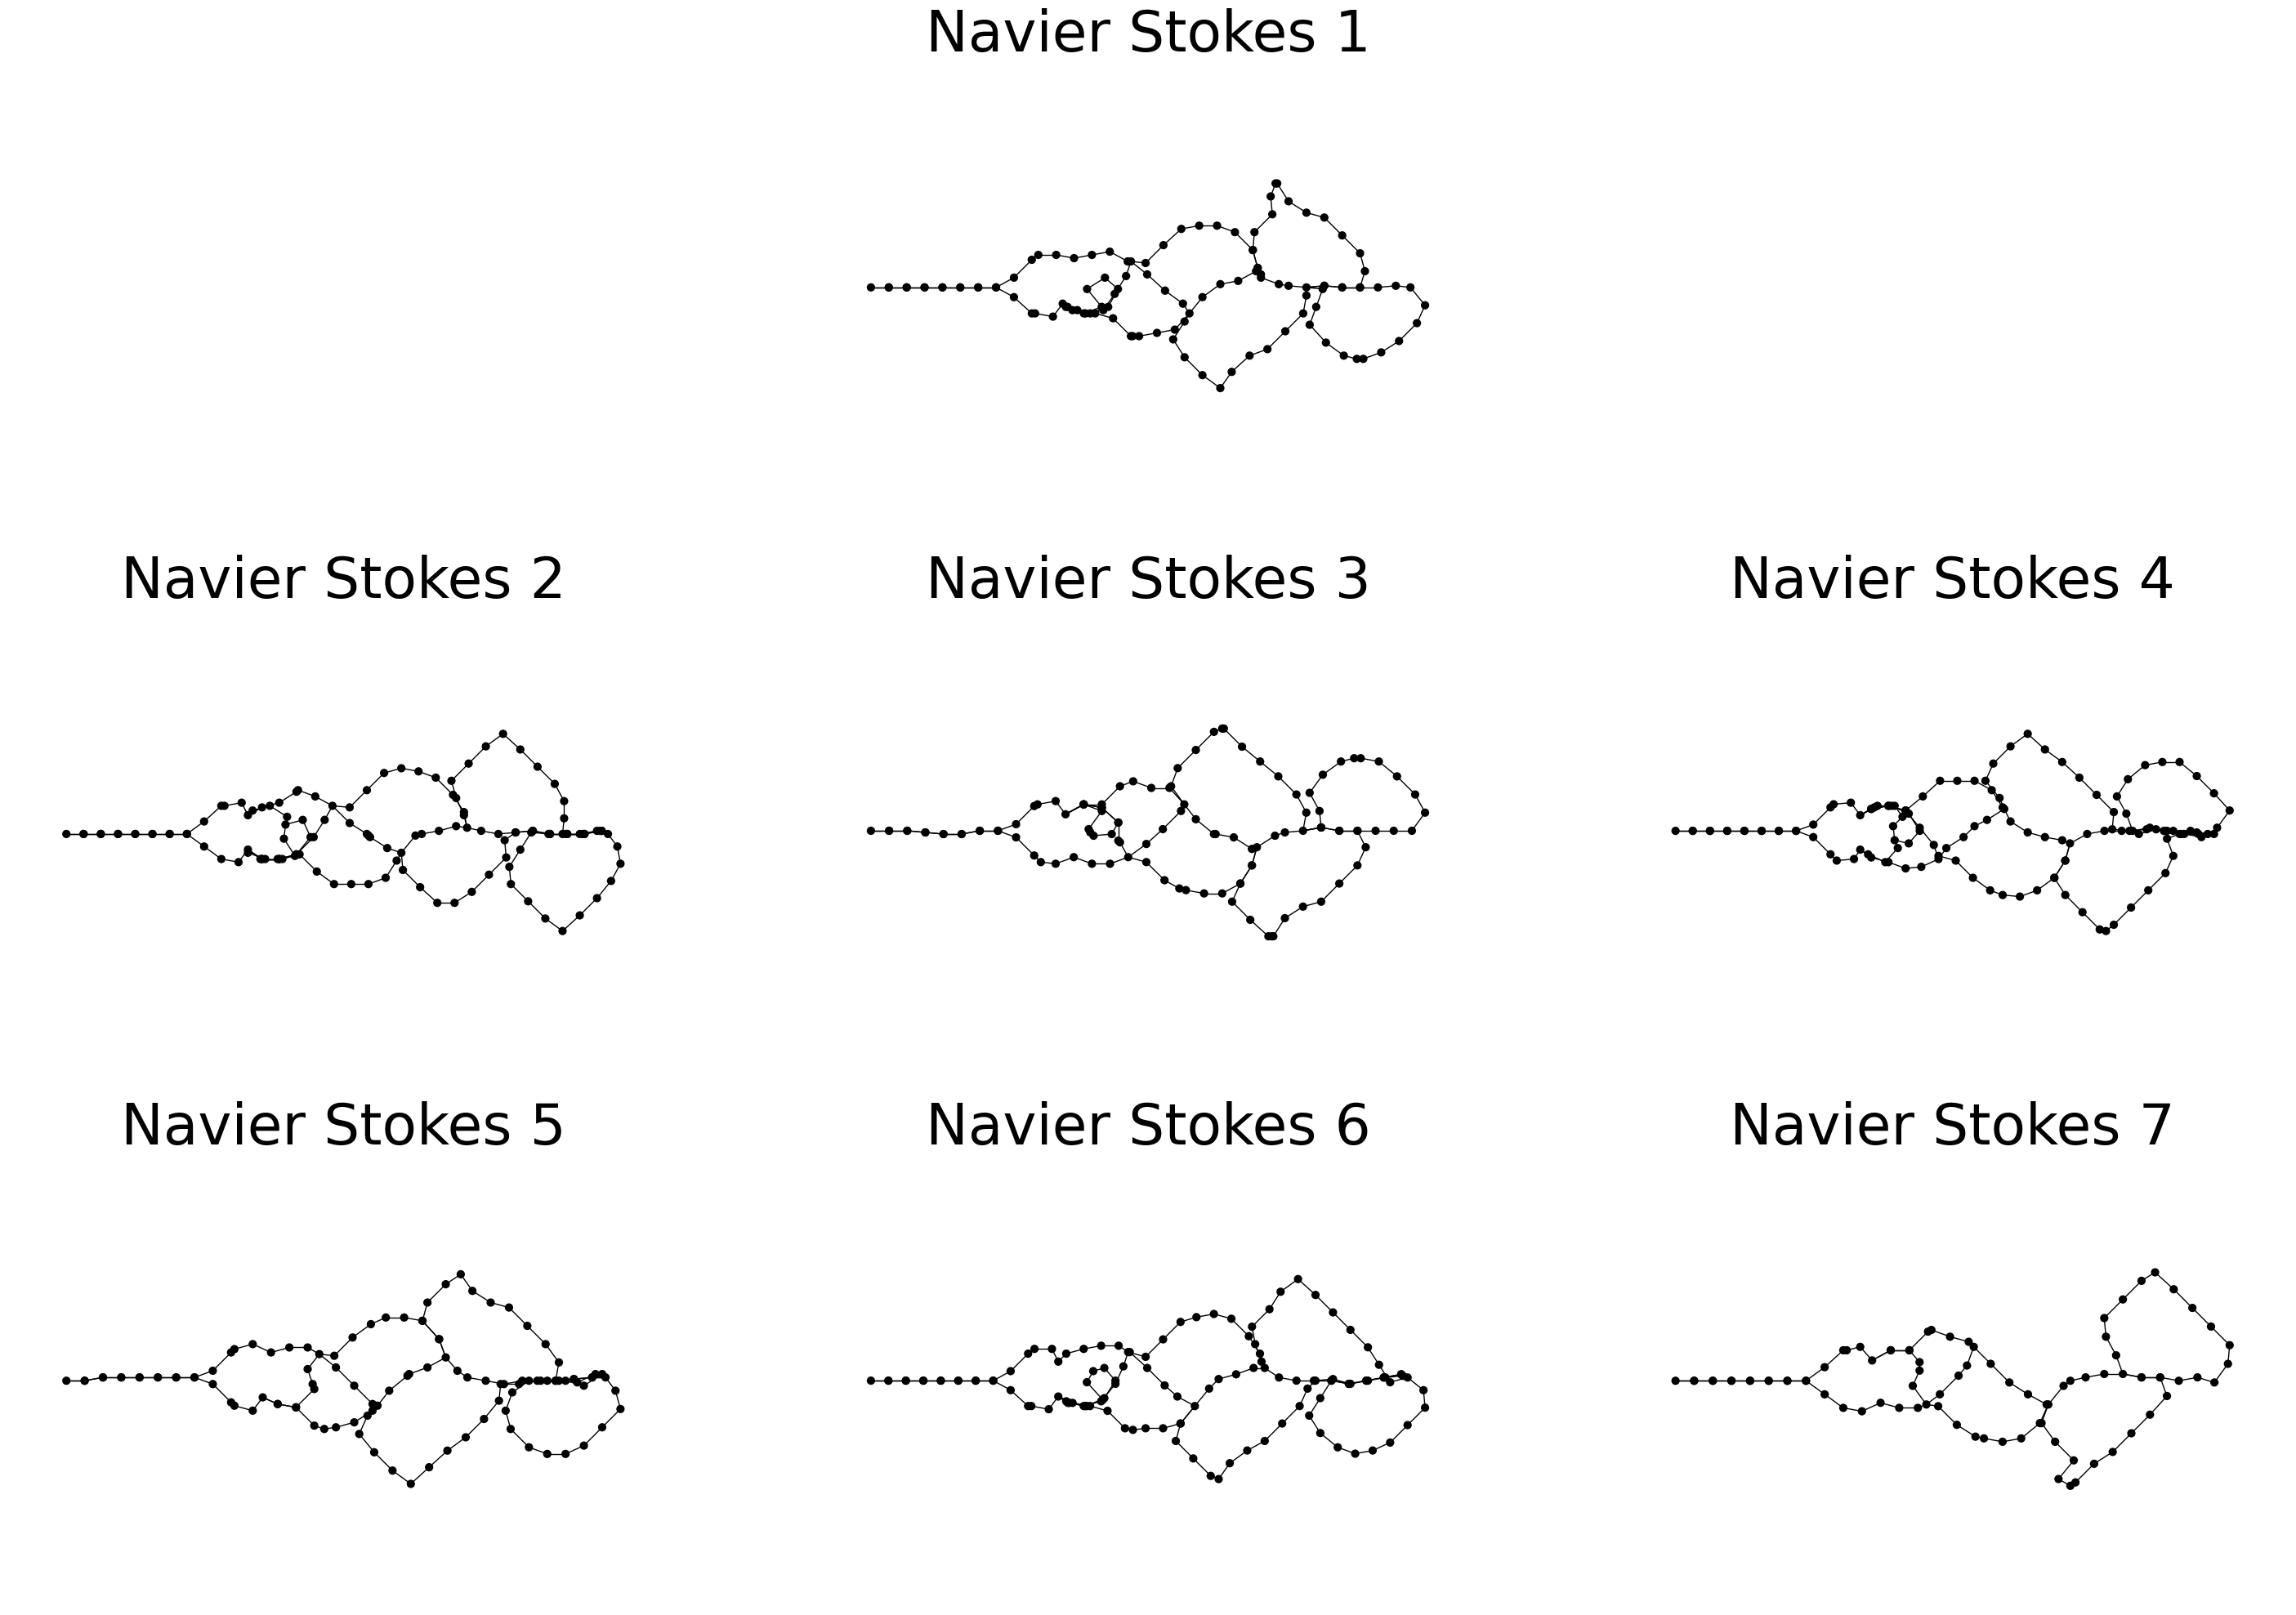

In [56]:
draw_graphs();

# GW

In [57]:
num_random_iter = 10
random_state = np.random.default_rng(42)

gw_distances = {}
gw_couplings = {}
  
for t, dest_net in dest_nets.items():
  min_coupling = None
  min_dist = float('inf')
  
  for _ in range(num_random_iter):
    coupling, dist = ot.GW(src_net, dest_net, random_G0=True, random_state=random_state)
    
    if dist < min_dist:
      min_dist = dist
      min_coupling = coupling
  
  gw_distances[t] = min_dist
  gw_couplings[t] = min_coupling

Text(0.5, 0.98, 'GW Transport')

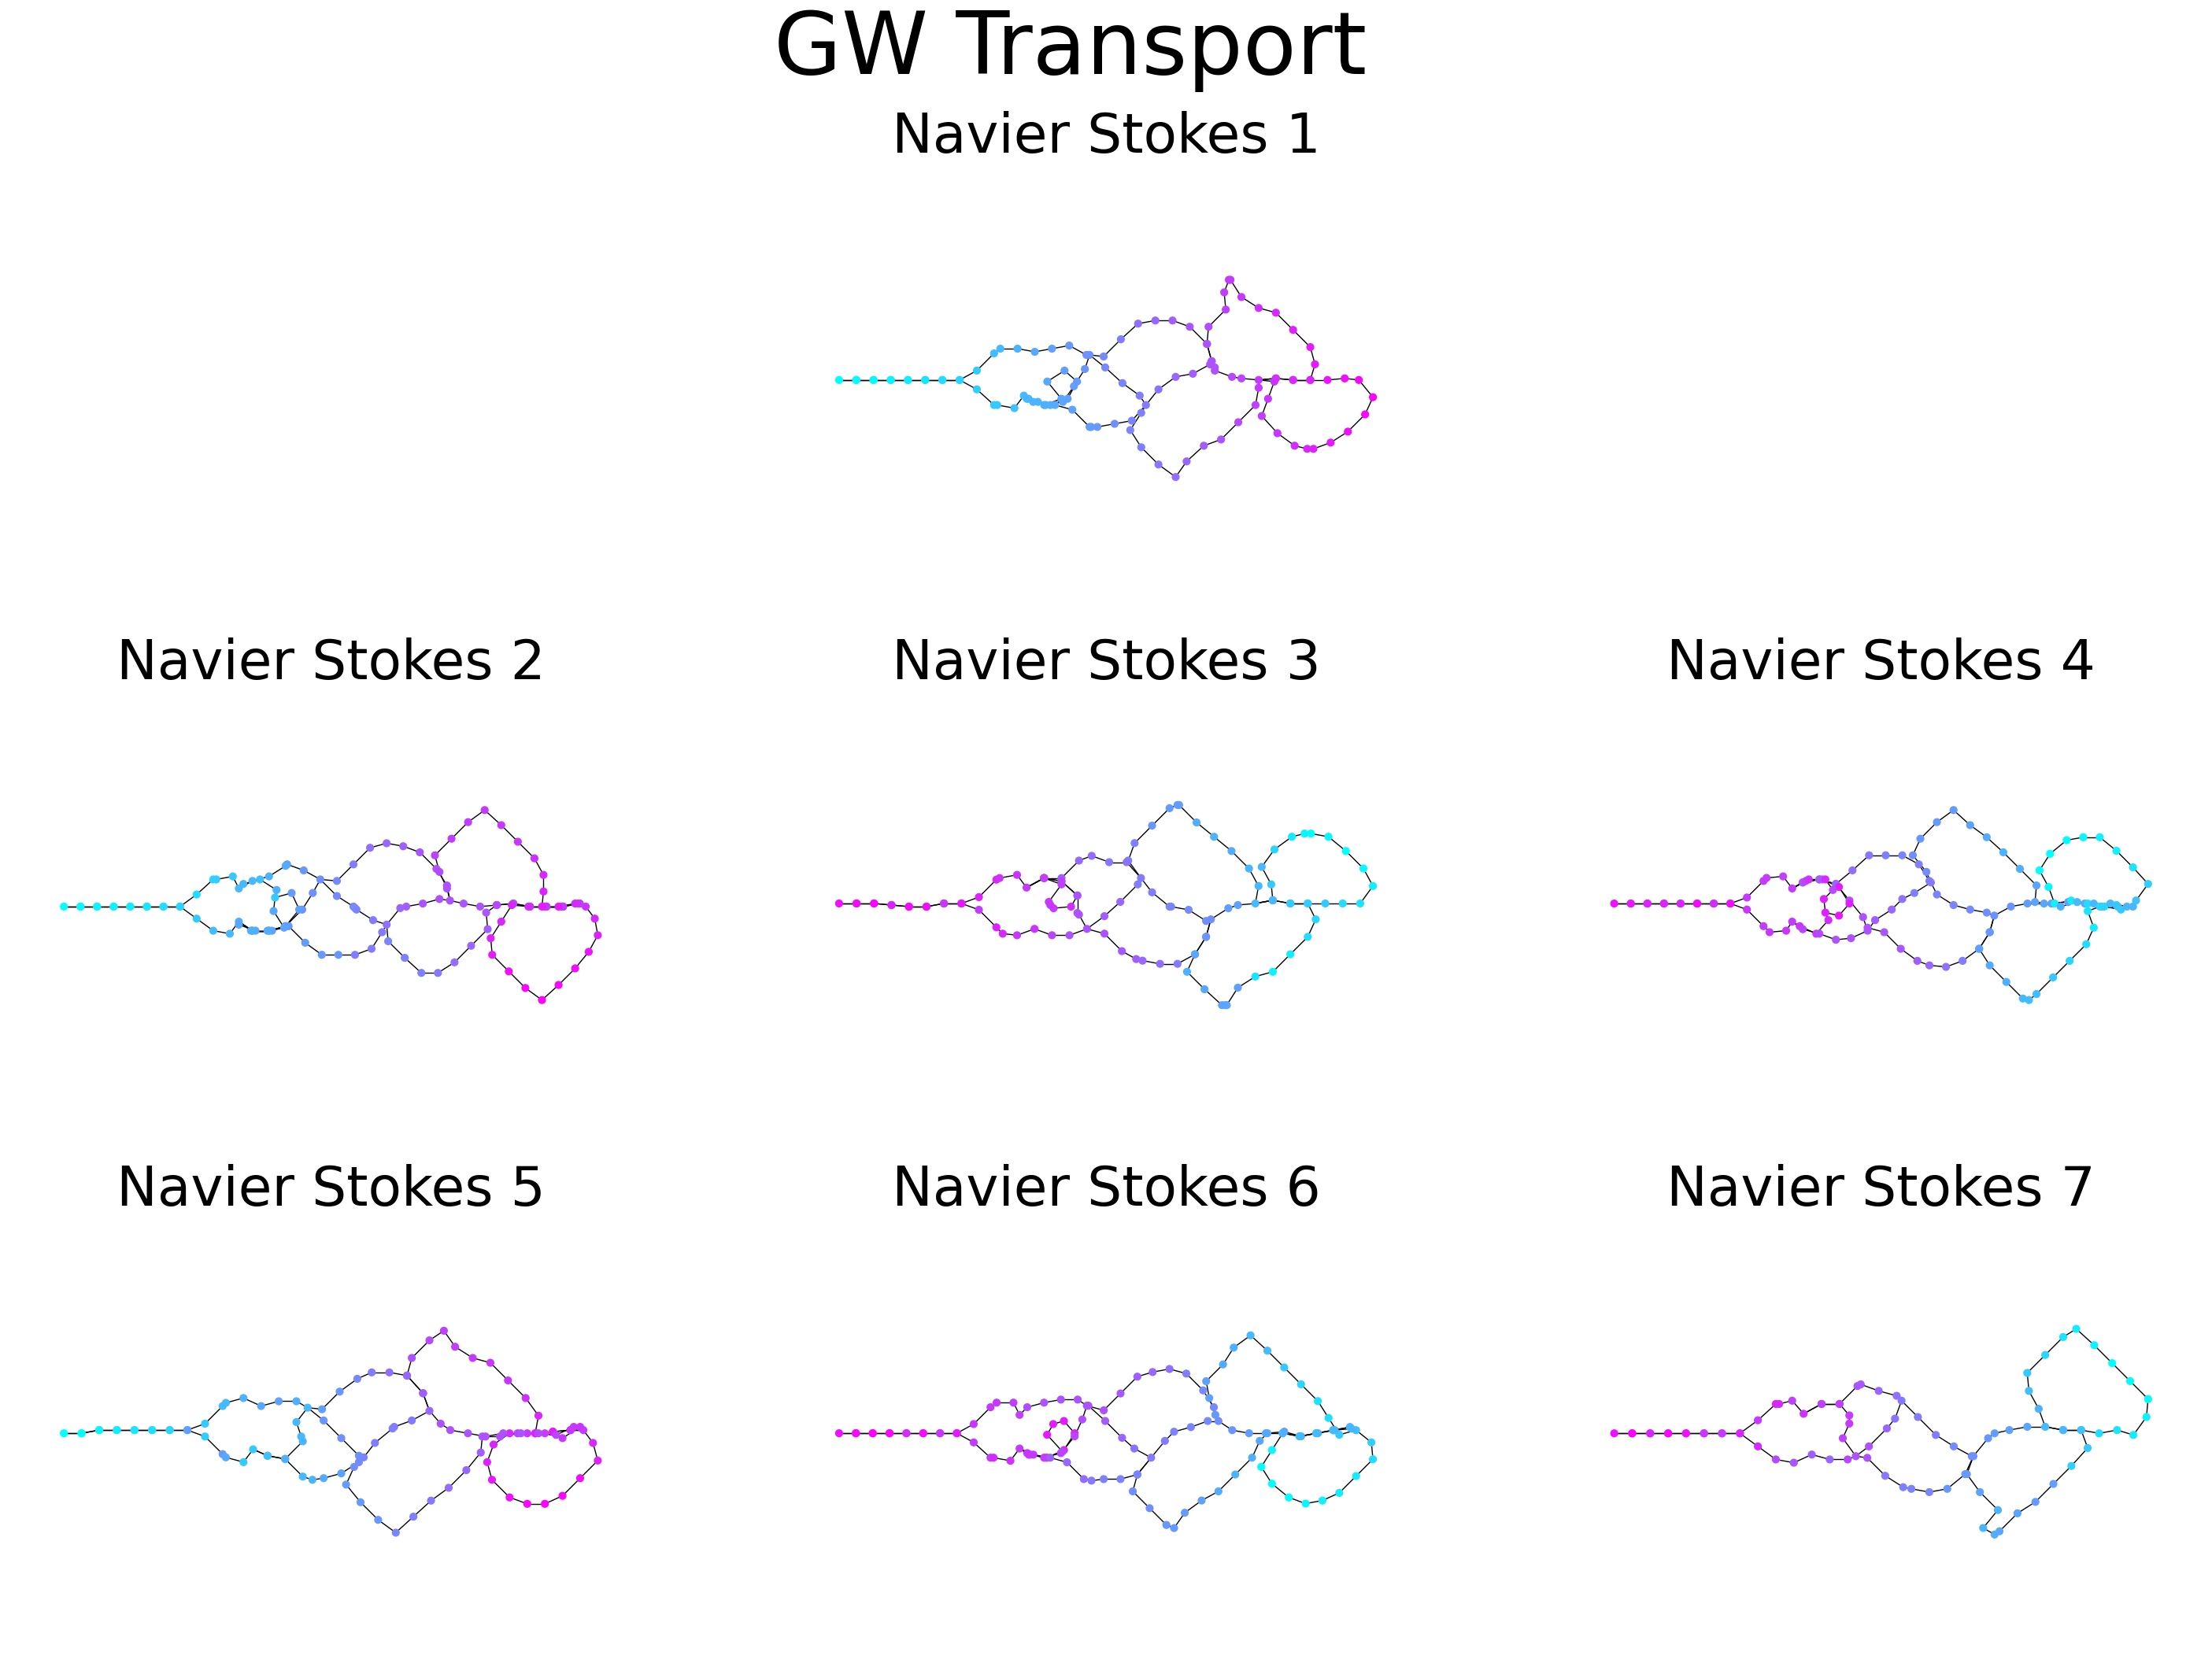

In [58]:
fig = draw_graphs(gw_couplings)
fig.suptitle('GW Transport', fontsize=80)

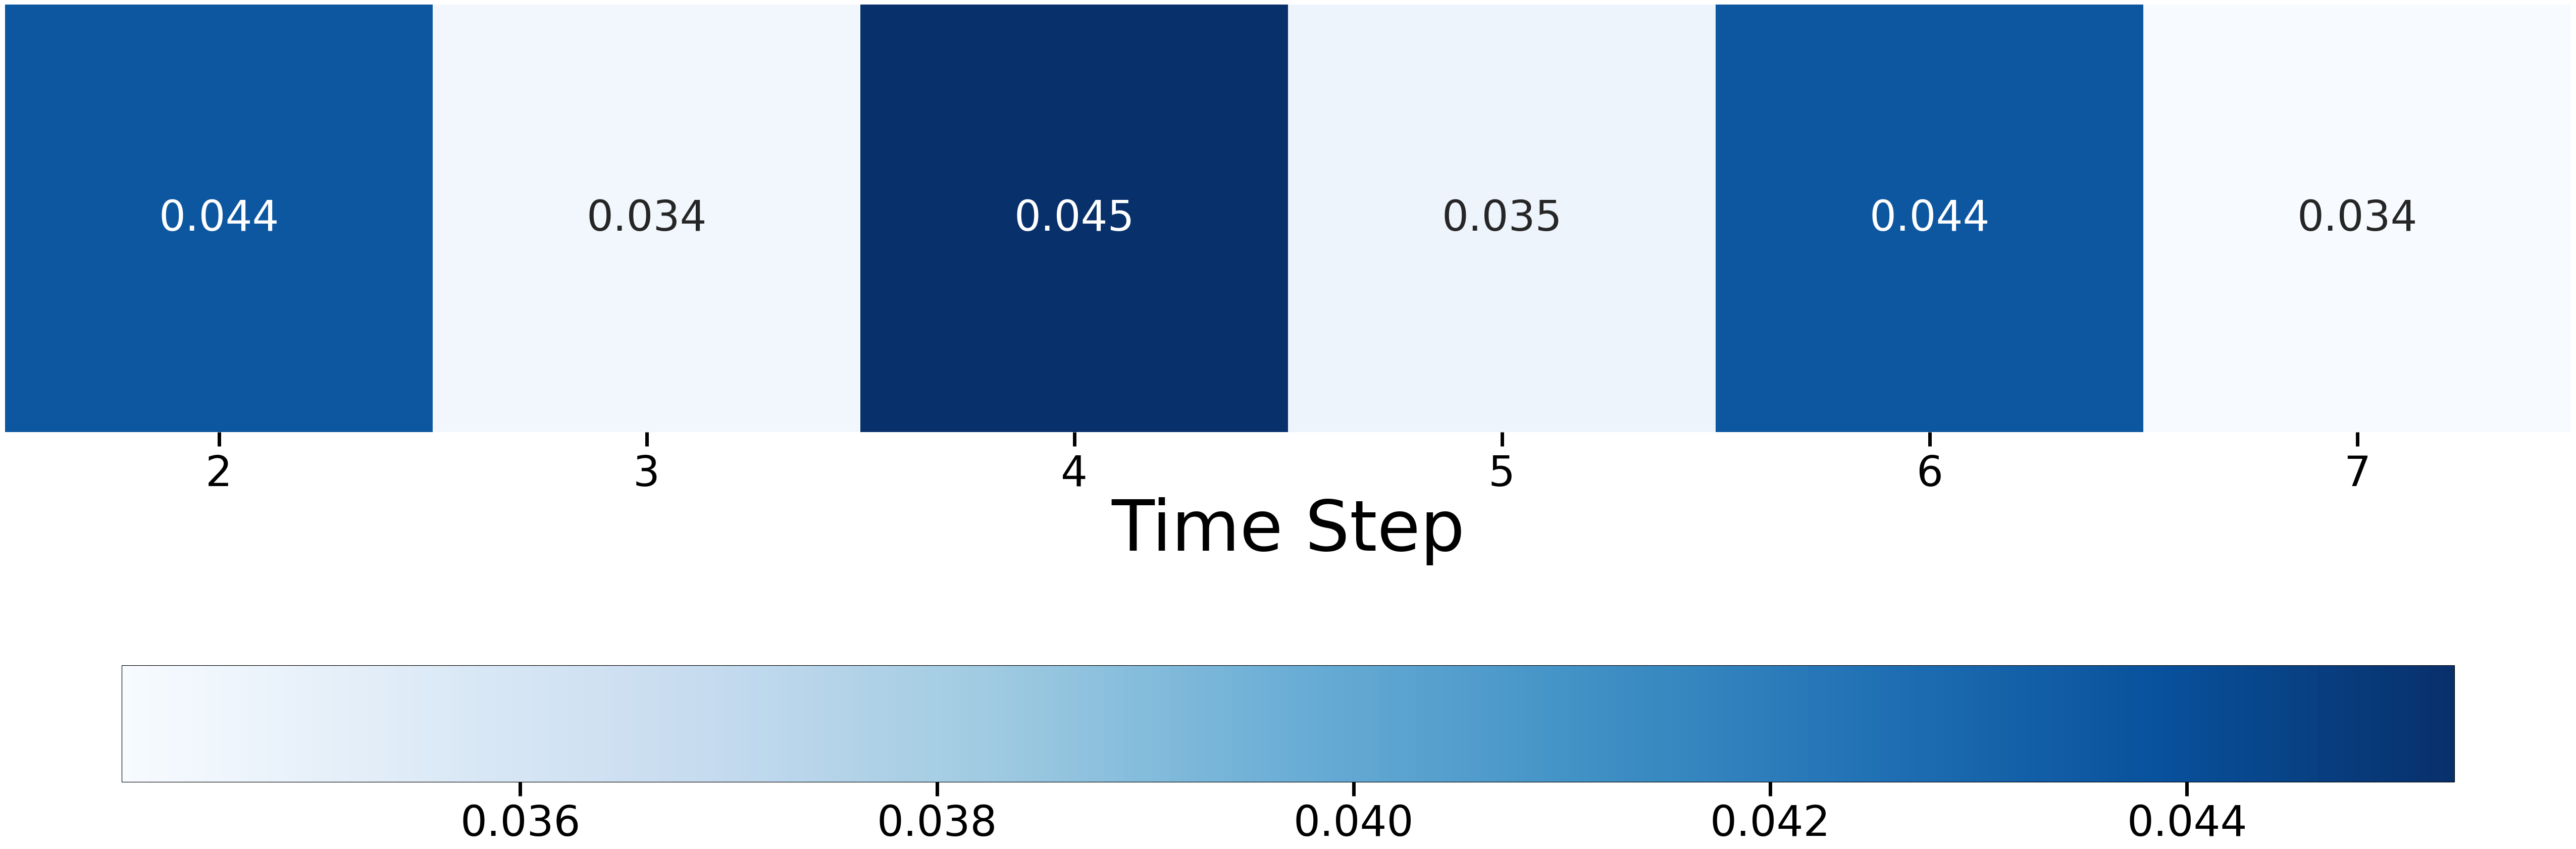

In [59]:
plot_distance_heatmap(gw_distances);

# fGW

In [60]:
fgw_distances = {}
fgw_couplings = {}
  
for t, dest_net in dest_nets.items():
  fgw_couplings[t], fgw_distances[t] = ot.fGW(src_net, dest_net, M = attributes.attrs[attributes.index_map[src_t], attributes.index_map[t]])

Text(0.5, 0.98, 'fGW Transport')

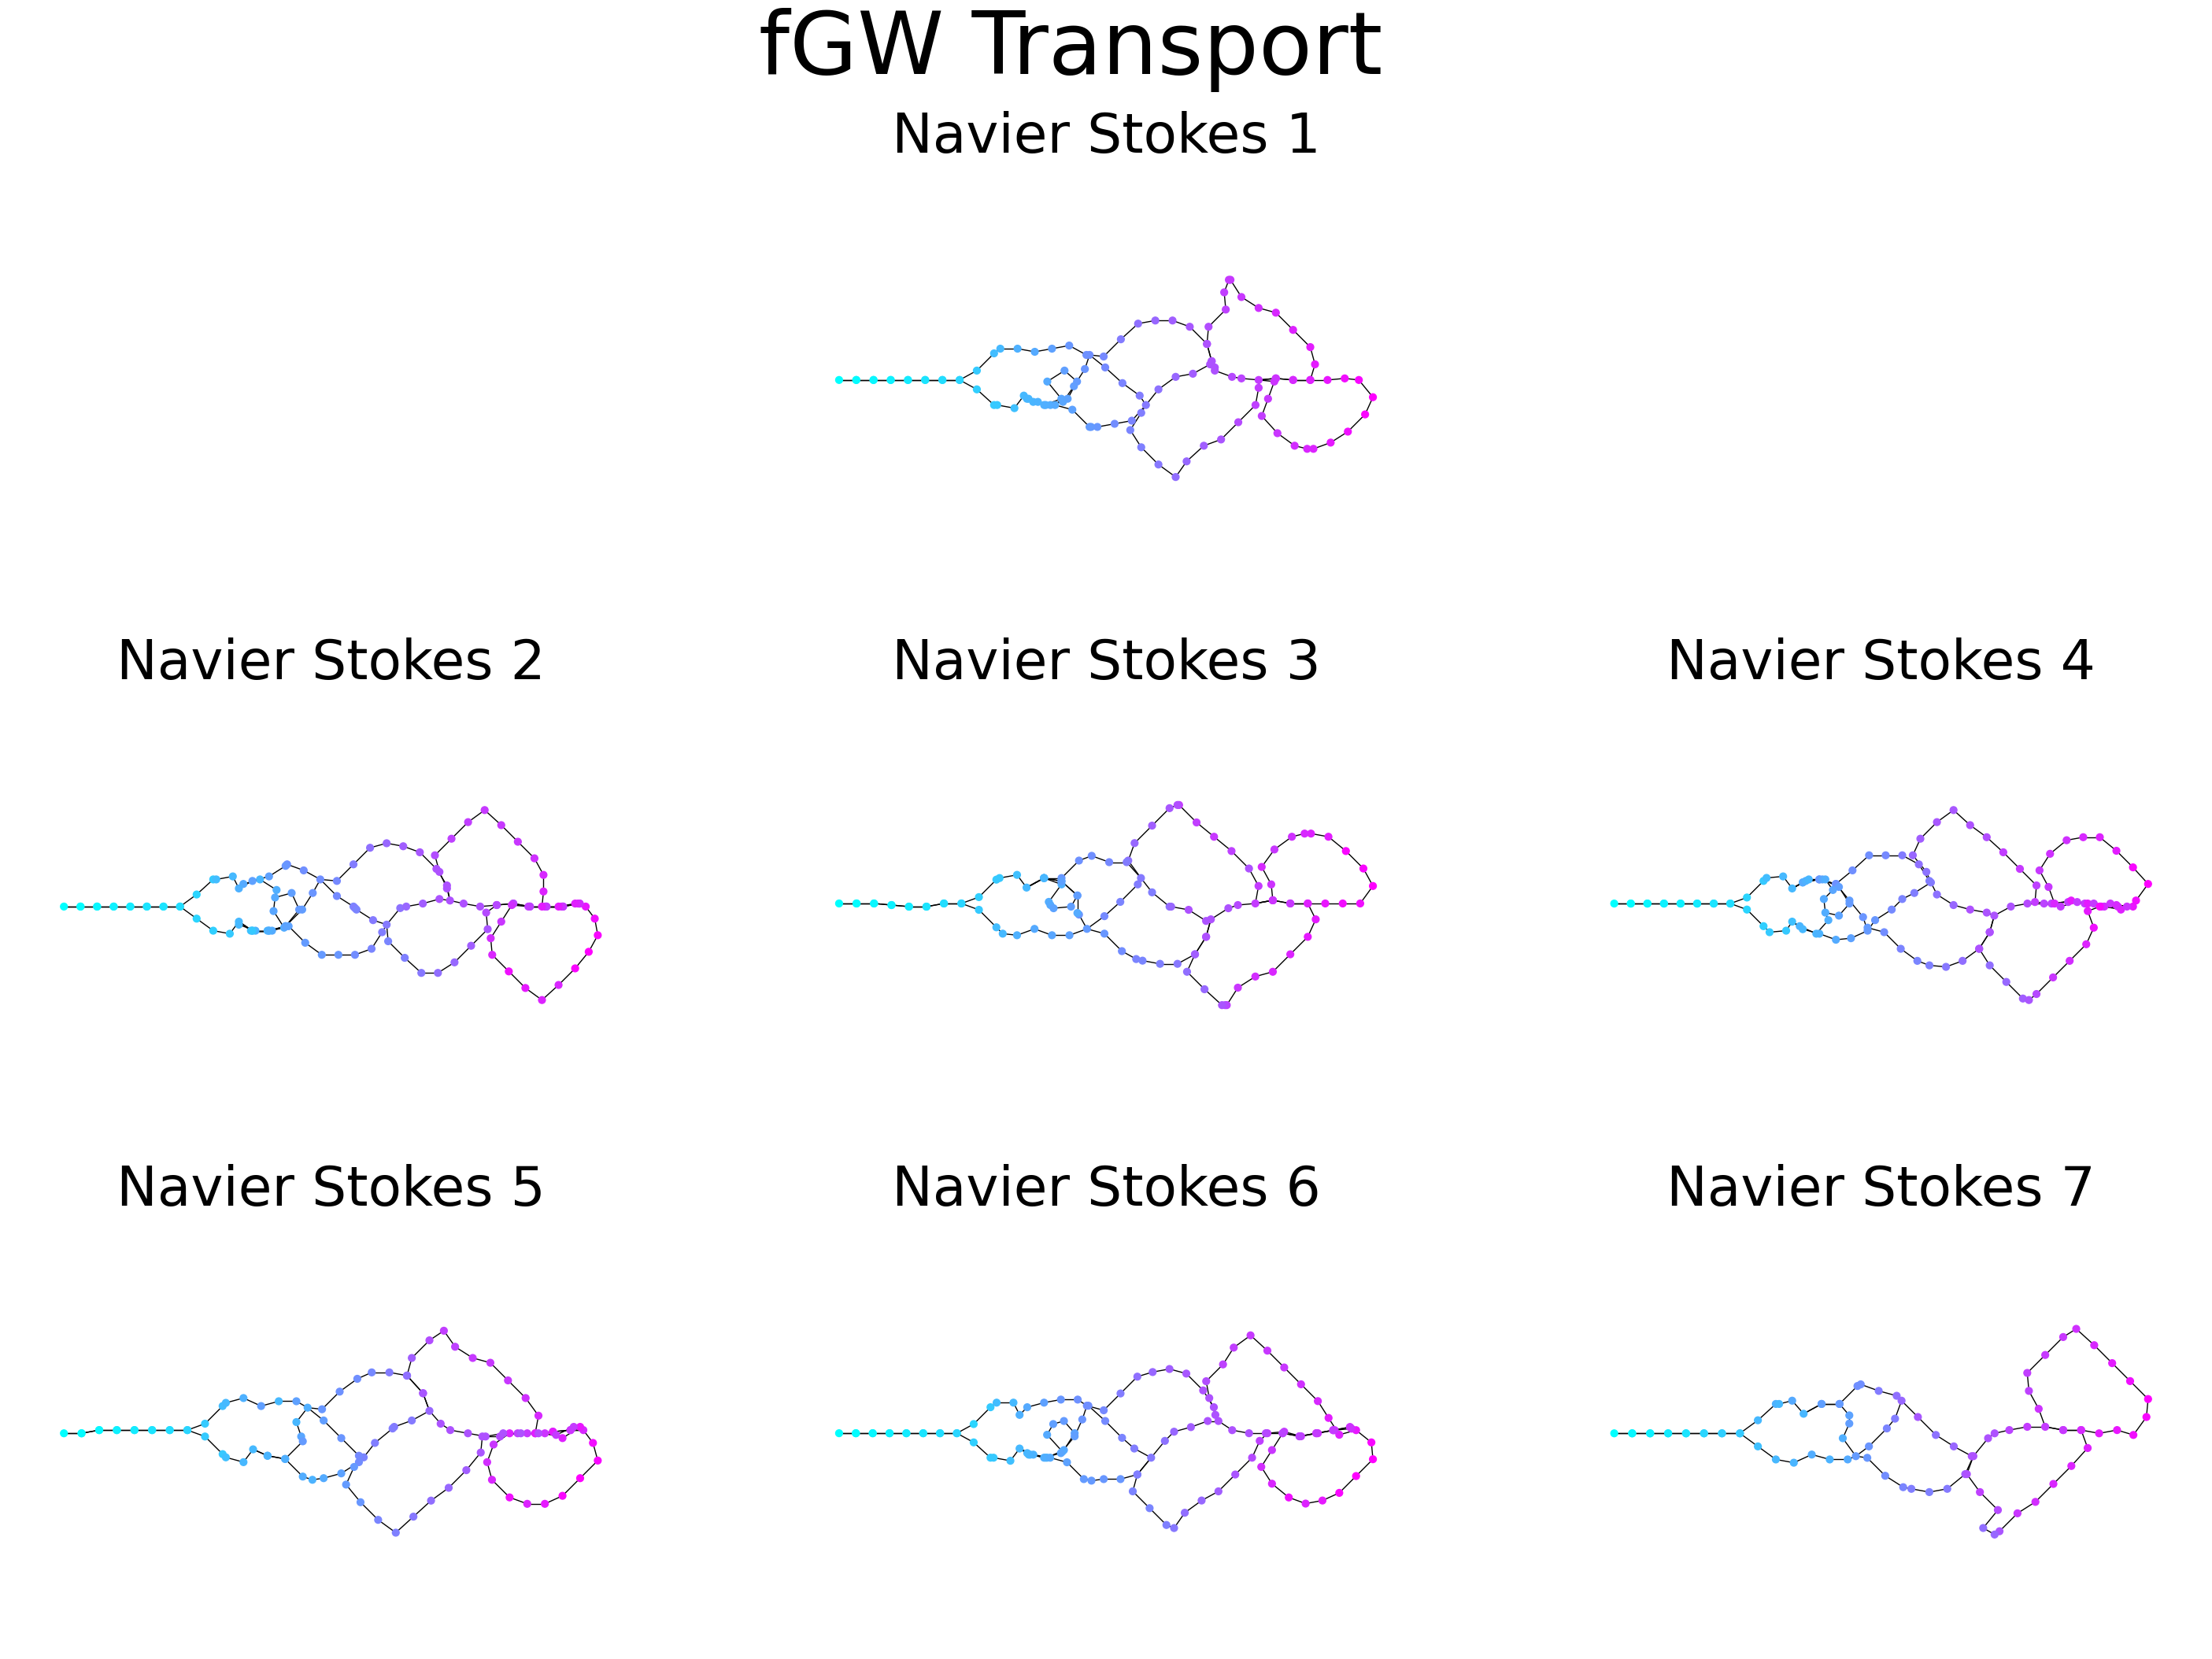

In [61]:
fig = draw_graphs(fgw_couplings)
fig.suptitle('fGW Transport', fontsize=80)

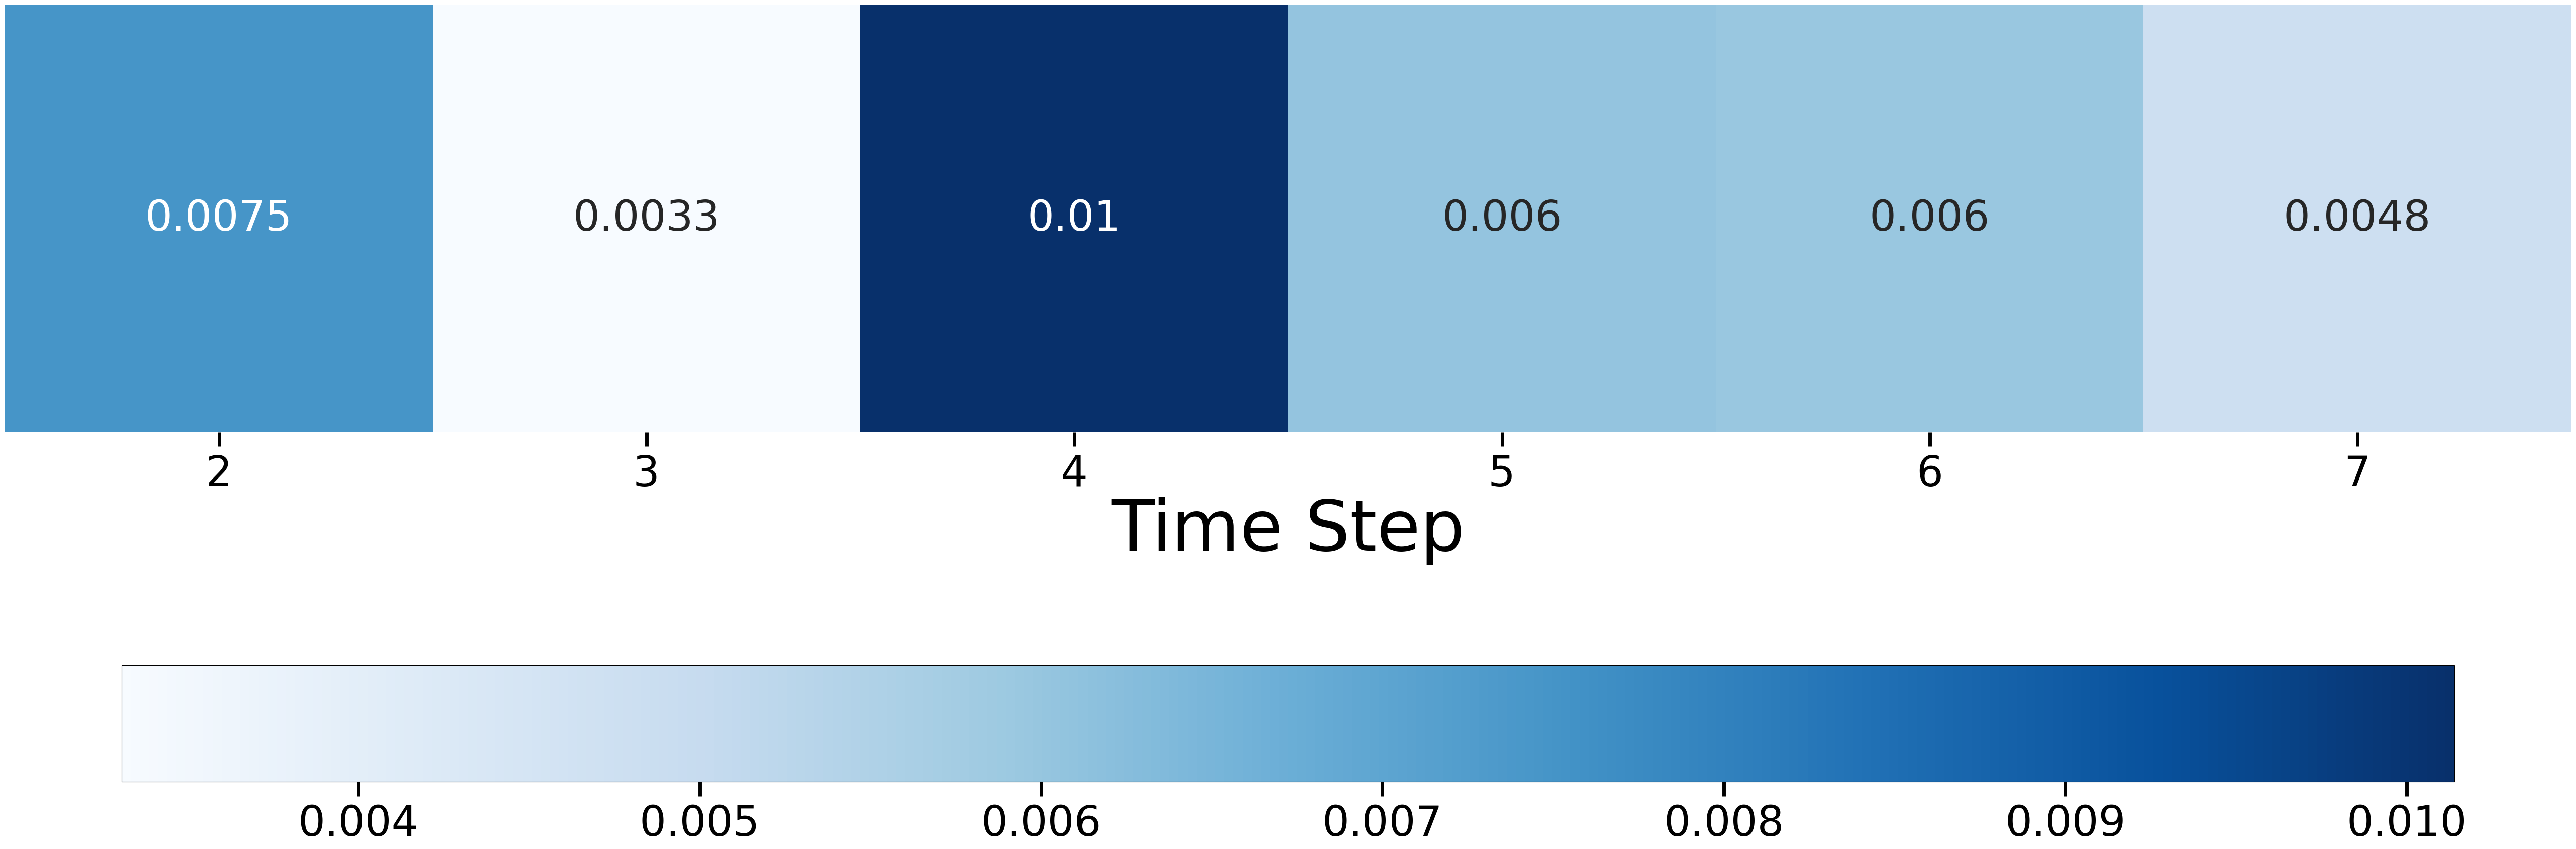

In [93]:
plot_distance_heatmap(fgw_distances);

# Wasserstein

In [63]:
w_distances = {}
w_couplings = {}
  
for t, dest_net in dest_nets.items():
  w_couplings[t], w_distances[t] = ot.Wasserstein(src_net, dest_net, M = attributes.attrs[attributes.index_map[src_t], attributes.index_map[t]])

Text(0.5, 0.98, 'Wasserstein Transport')

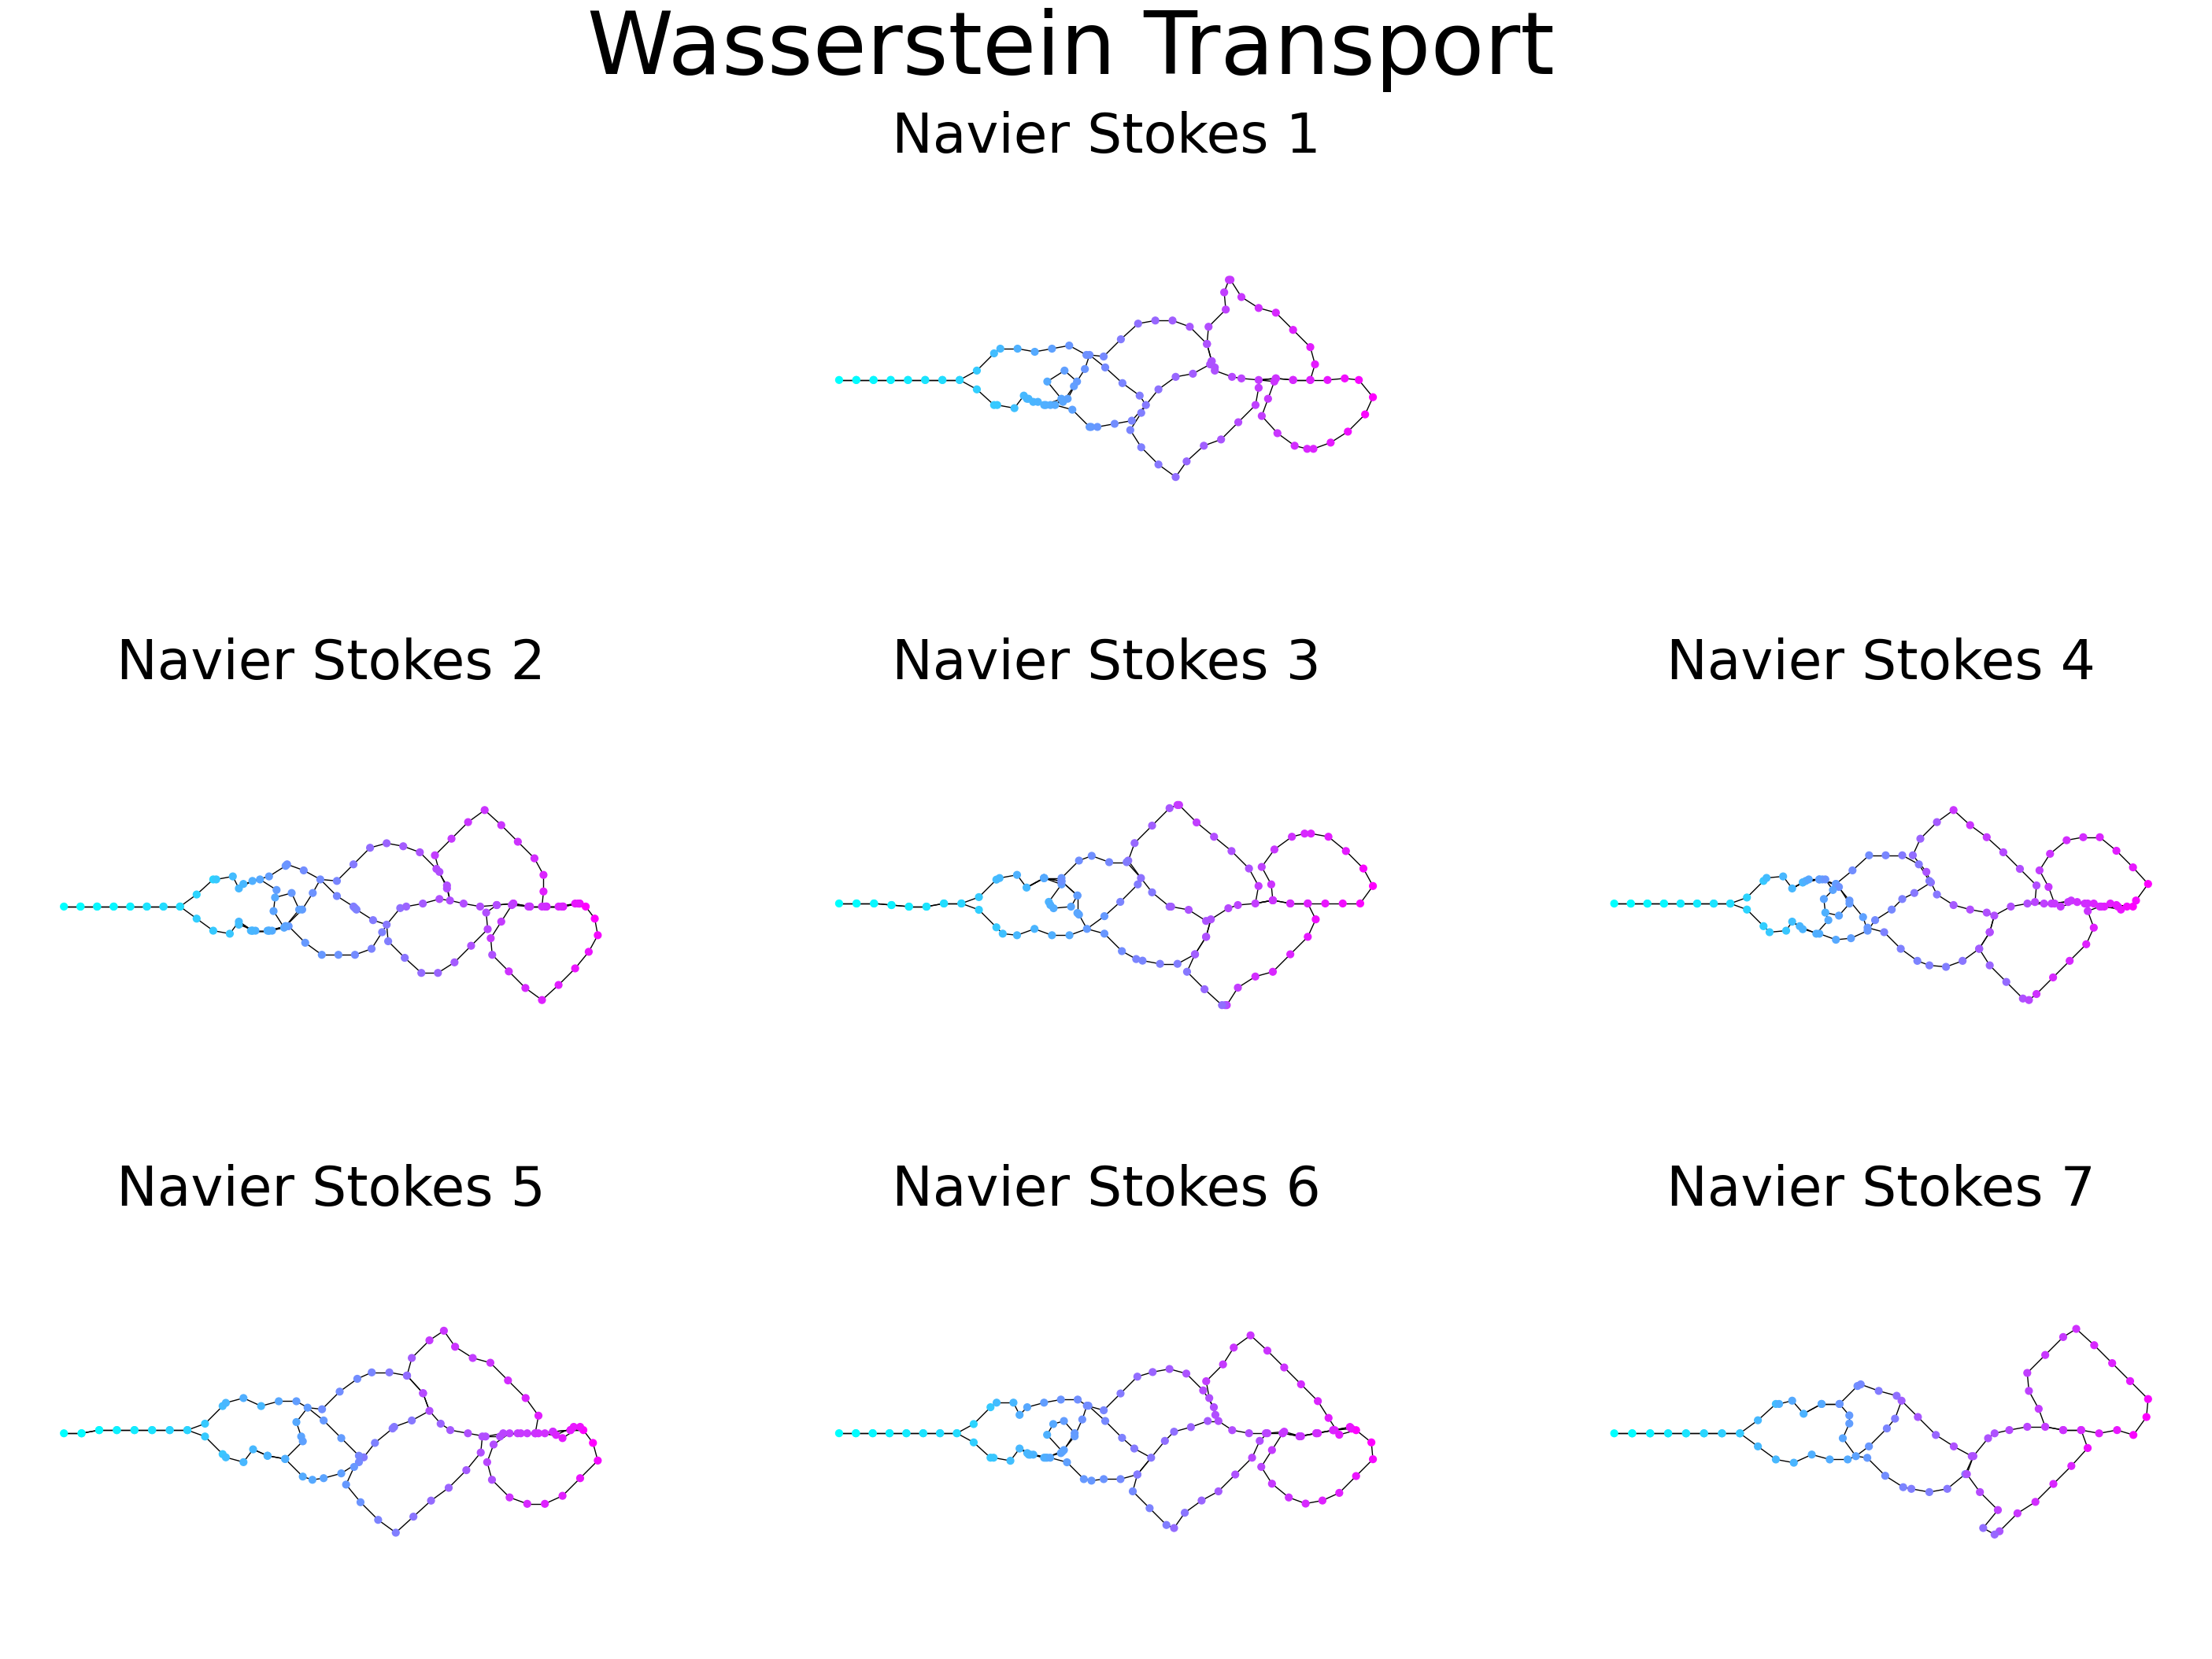

In [64]:
fig = draw_graphs(w_couplings)
fig.suptitle('Wasserstein Transport', fontsize=80)

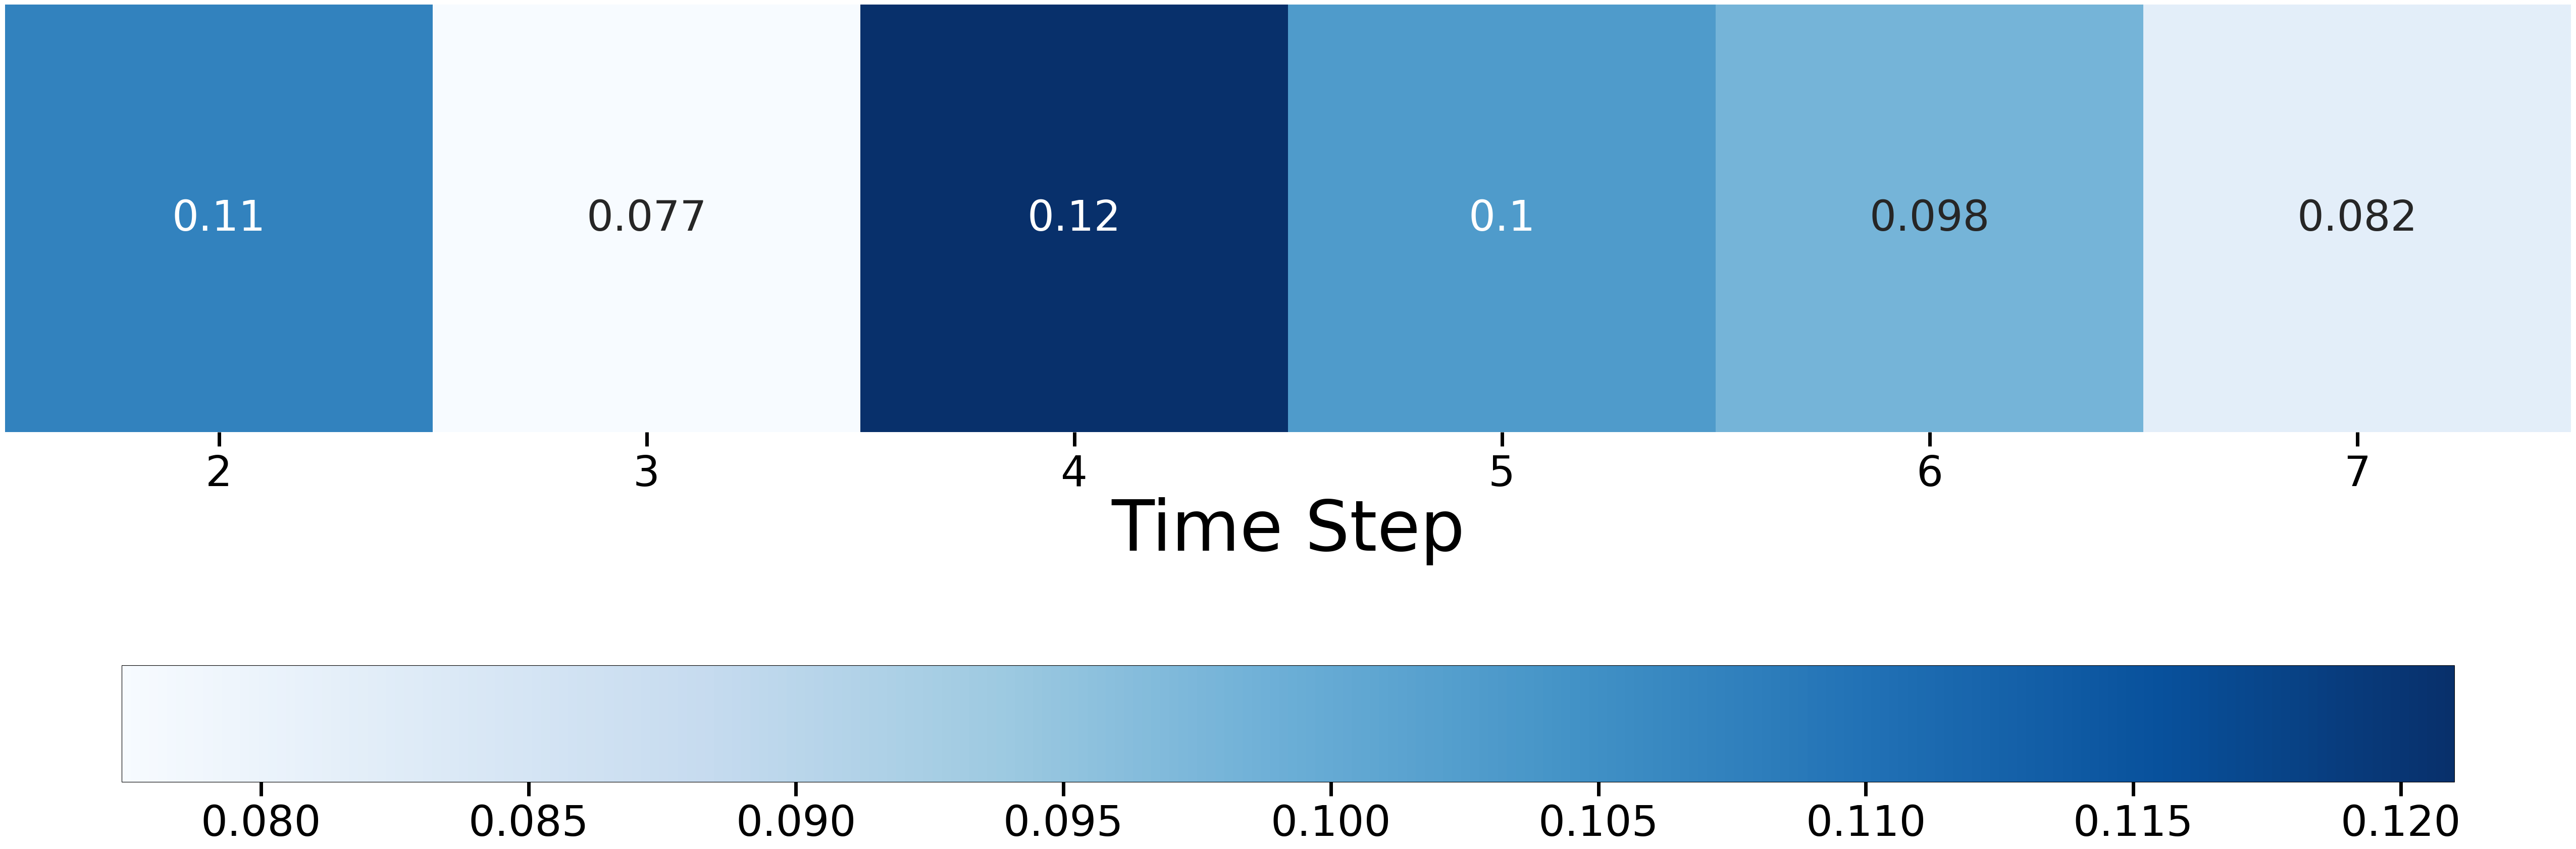

In [65]:
plot_distance_heatmap(w_distances);

# pfGW

In [78]:
max_match_pfgw = pipeline.max_match('navier_stokes_pfgw_max_match').build()

> [max_match:navier_stokes_pfgw_max_match] config unchanged, loading


Text(0.5, 0.98, 'Maximum Match Distance pfGW')

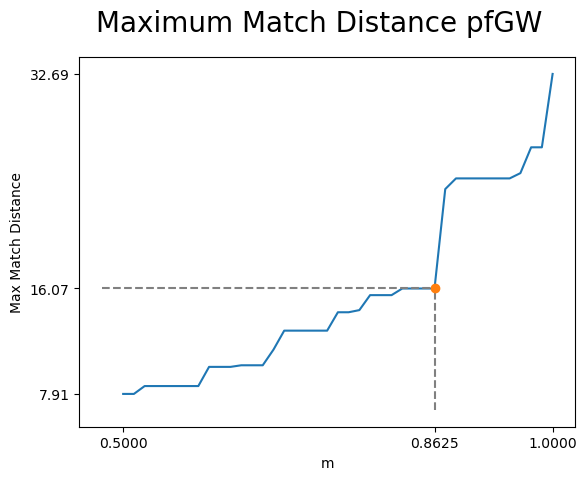

In [79]:
m_pfgw = 0.8625

fig = plot_max_match_results(max_match_pfgw, m_pfgw)
fig.suptitle('Maximum Match Distance pfGW', fontsize=20)

In [80]:
pfgw_distances = {}
pfgw_couplings = {}
  
for t, dest_net in dest_nets.items():
  pfgw_couplings[t], pfgw_distances[t] = ot.pfGW(src_net, dest_net, m = m_pfgw, M = attributes.attrs[attributes.index_map[src_t], attributes.index_map[t]])

Text(0.5, 0.98, 'pfGW Transport')

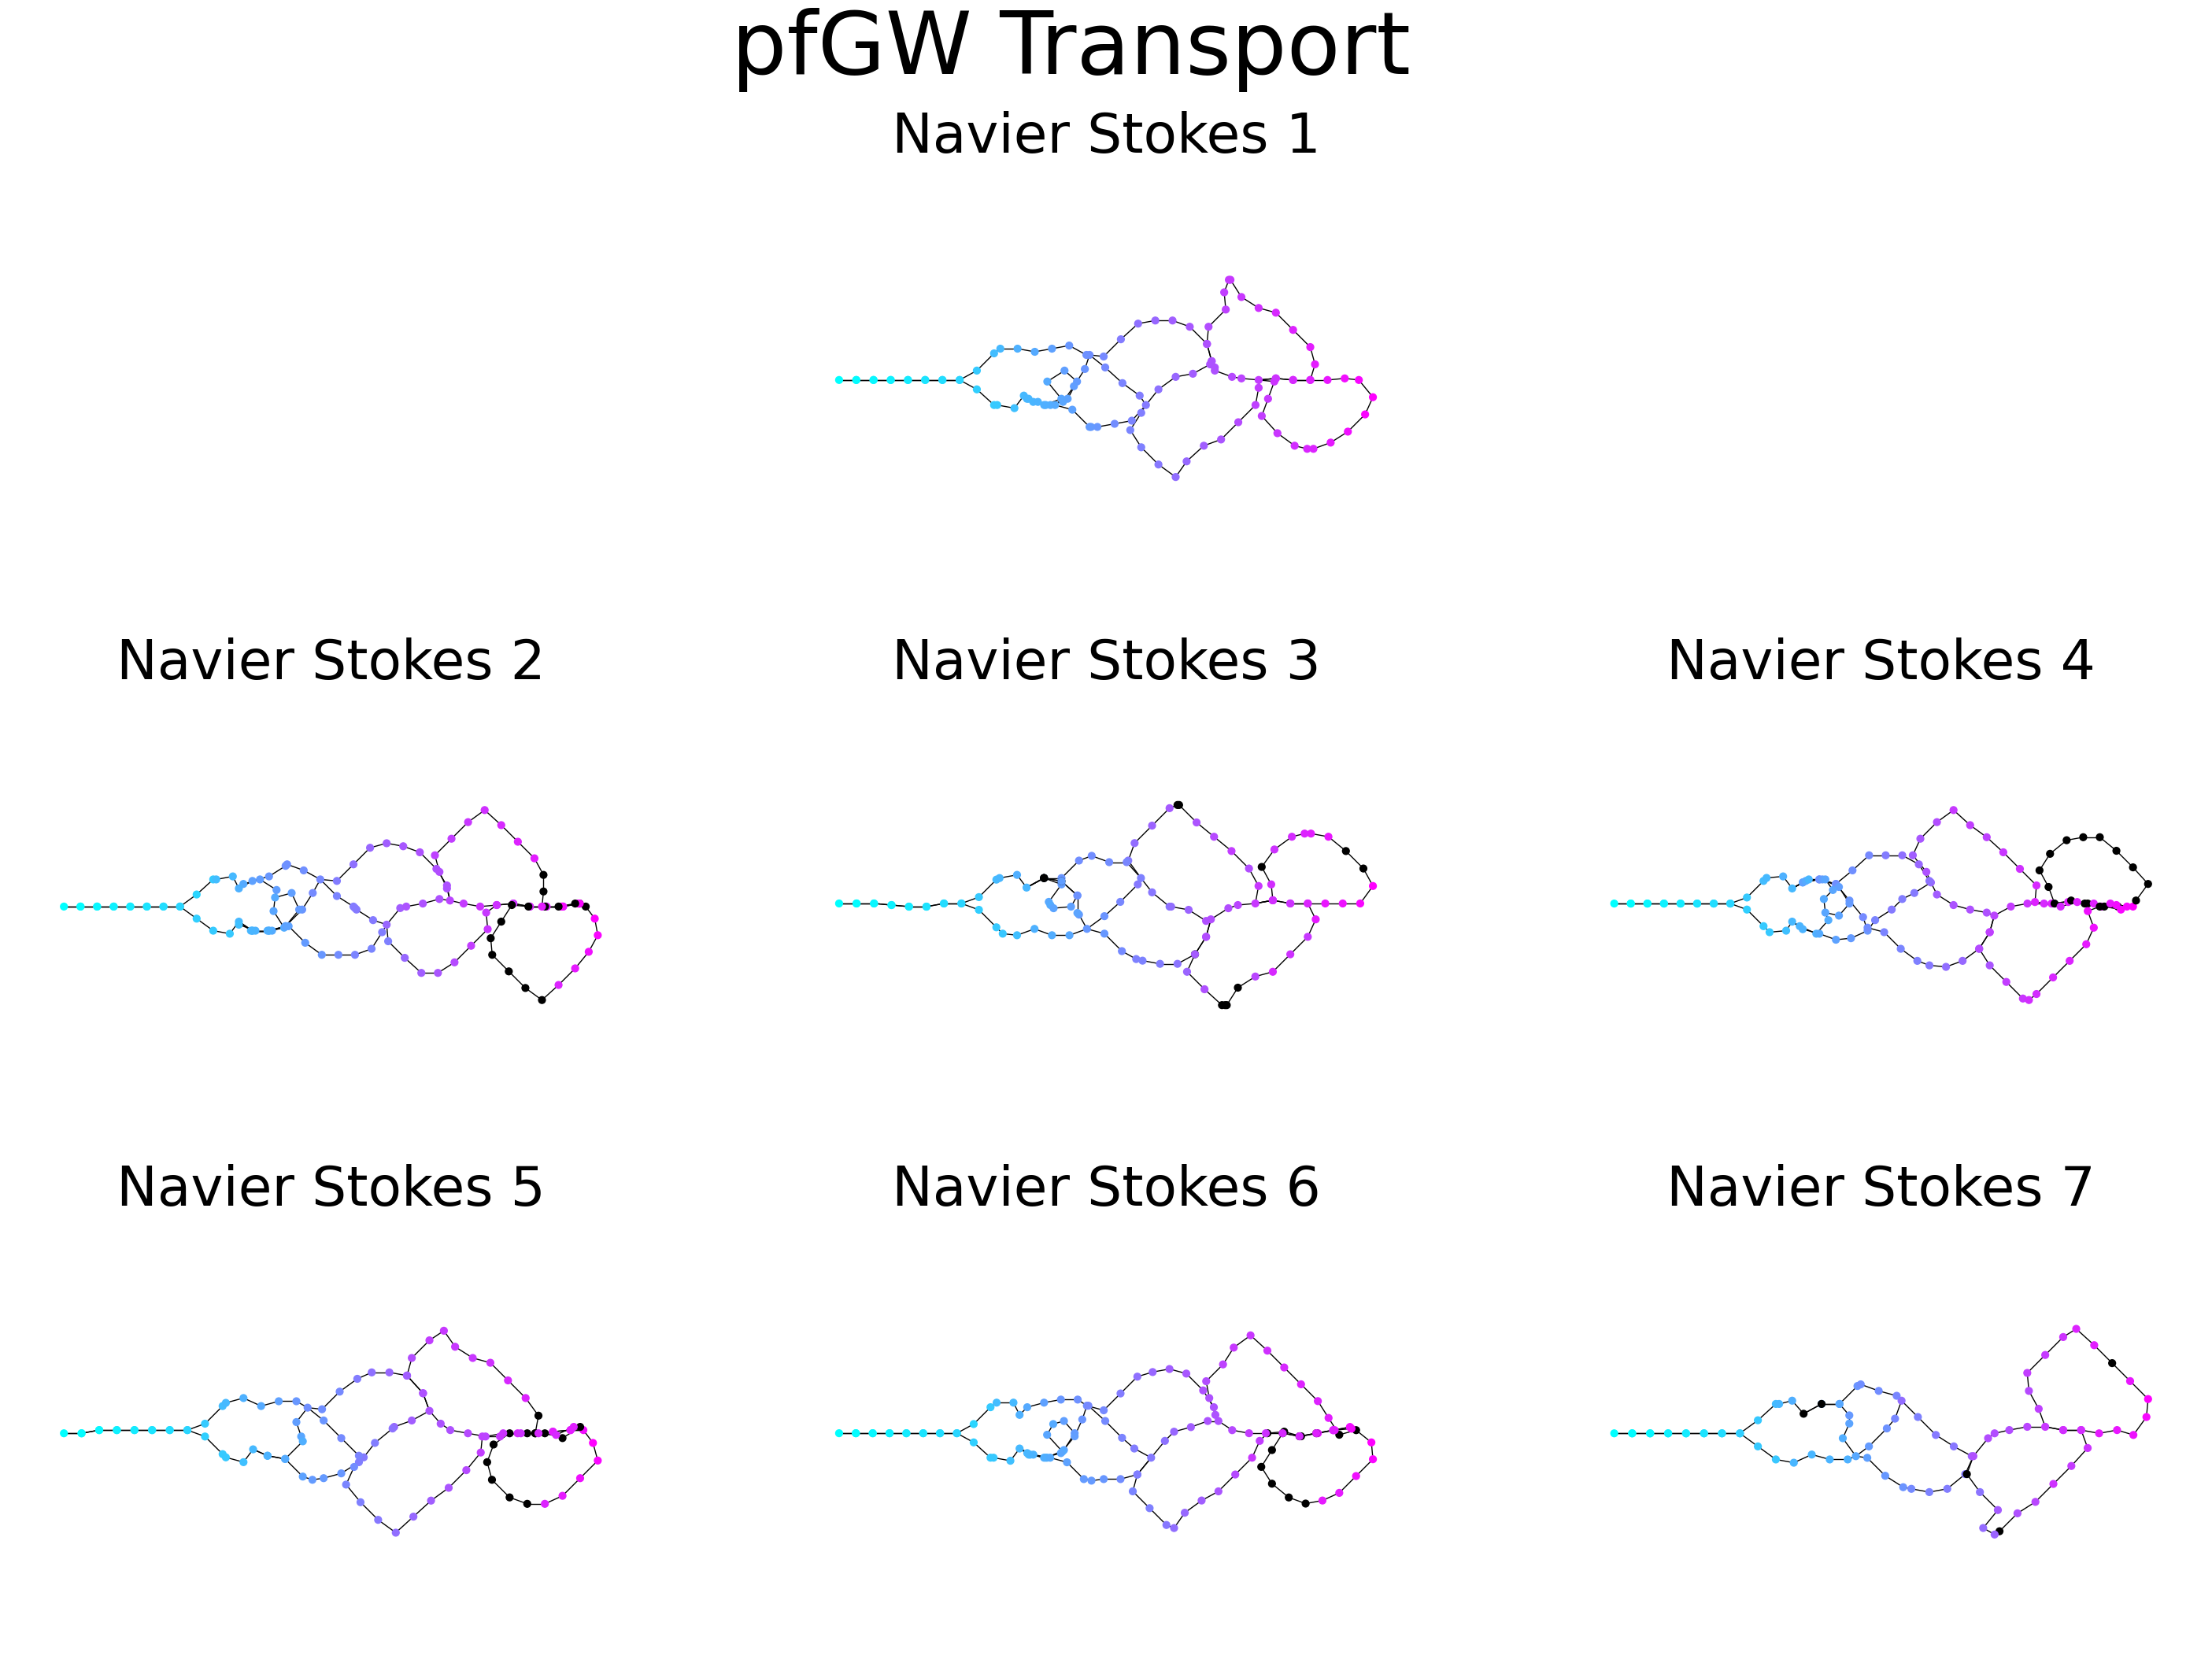

In [81]:
fig = draw_graphs(pfgw_couplings)
fig.suptitle('pfGW Transport', fontsize=80)

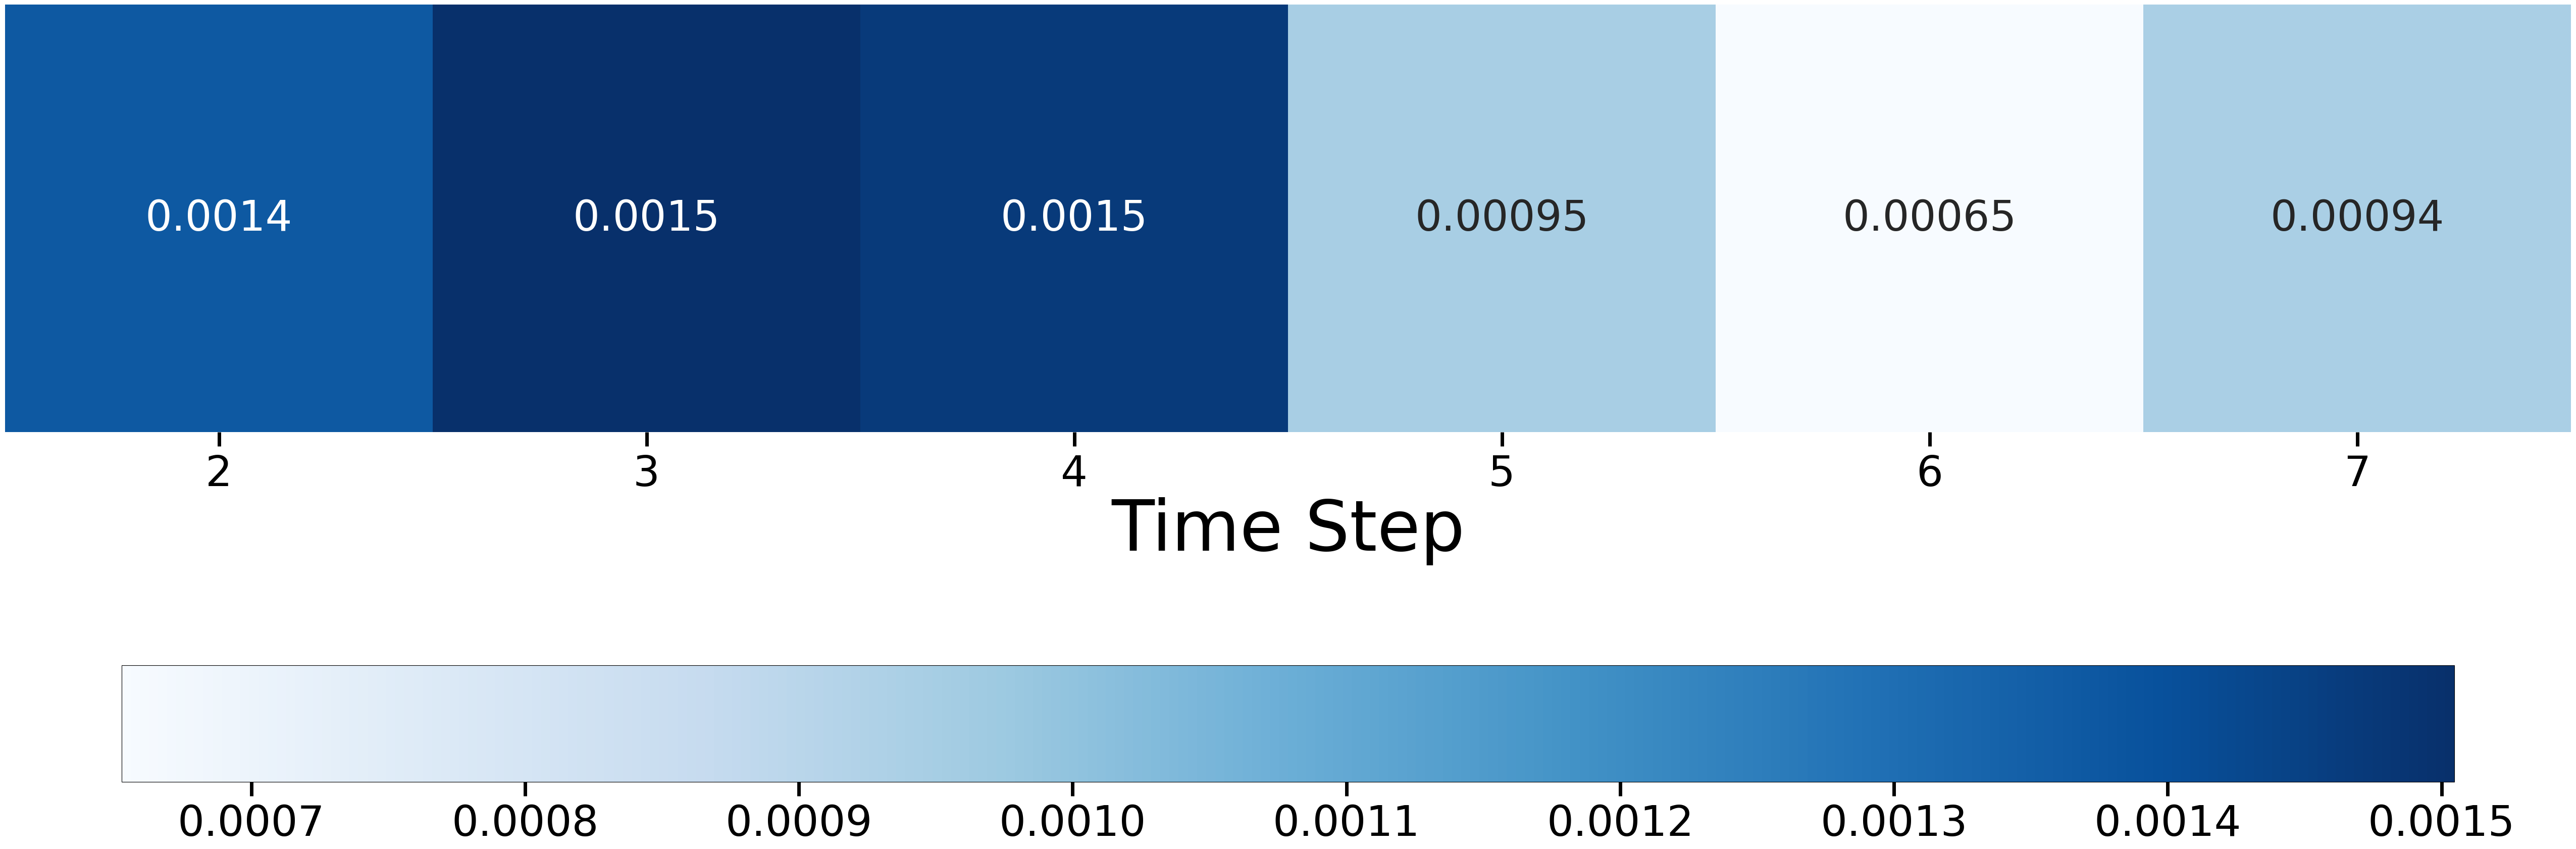

In [82]:
plot_distance_heatmap(pfgw_distances);

# pWasserstein

In [83]:
max_match_wasserstein = pipeline.max_match('navier_stokes_wasserstein_max_match').build()

> [max_match:navier_stokes_wasserstein_max_match] config unchanged, loading


Text(0.5, 0.98, 'Maximum Match Distance pW')

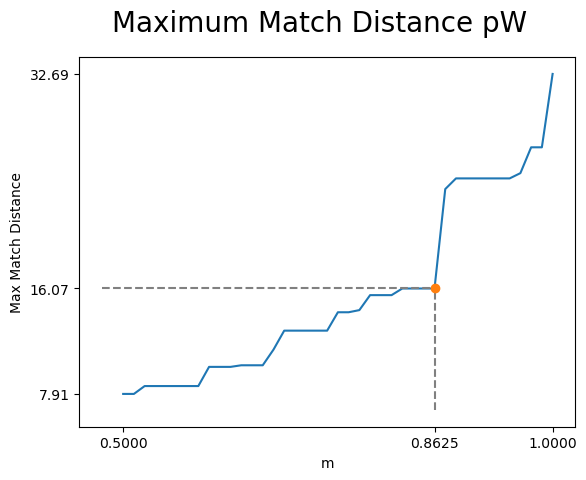

In [92]:
m_w = 0.8625

fig = plot_max_match_results(max_match_pfgw, m_w)
fig.suptitle('Maximum Match Distance pW', fontsize=20)

In [85]:
pw_distances = {}
pw_couplings = {}
  
for t, dest_net in dest_nets.items():
  pw_couplings[t], pw_distances[t] = ot.pWasserstein(src_net, dest_net, m = m_w, M = attributes.attrs[attributes.index_map[src_t], attributes.index_map[t]])

Text(0.5, 0.98, 'pWasserstein Transport')

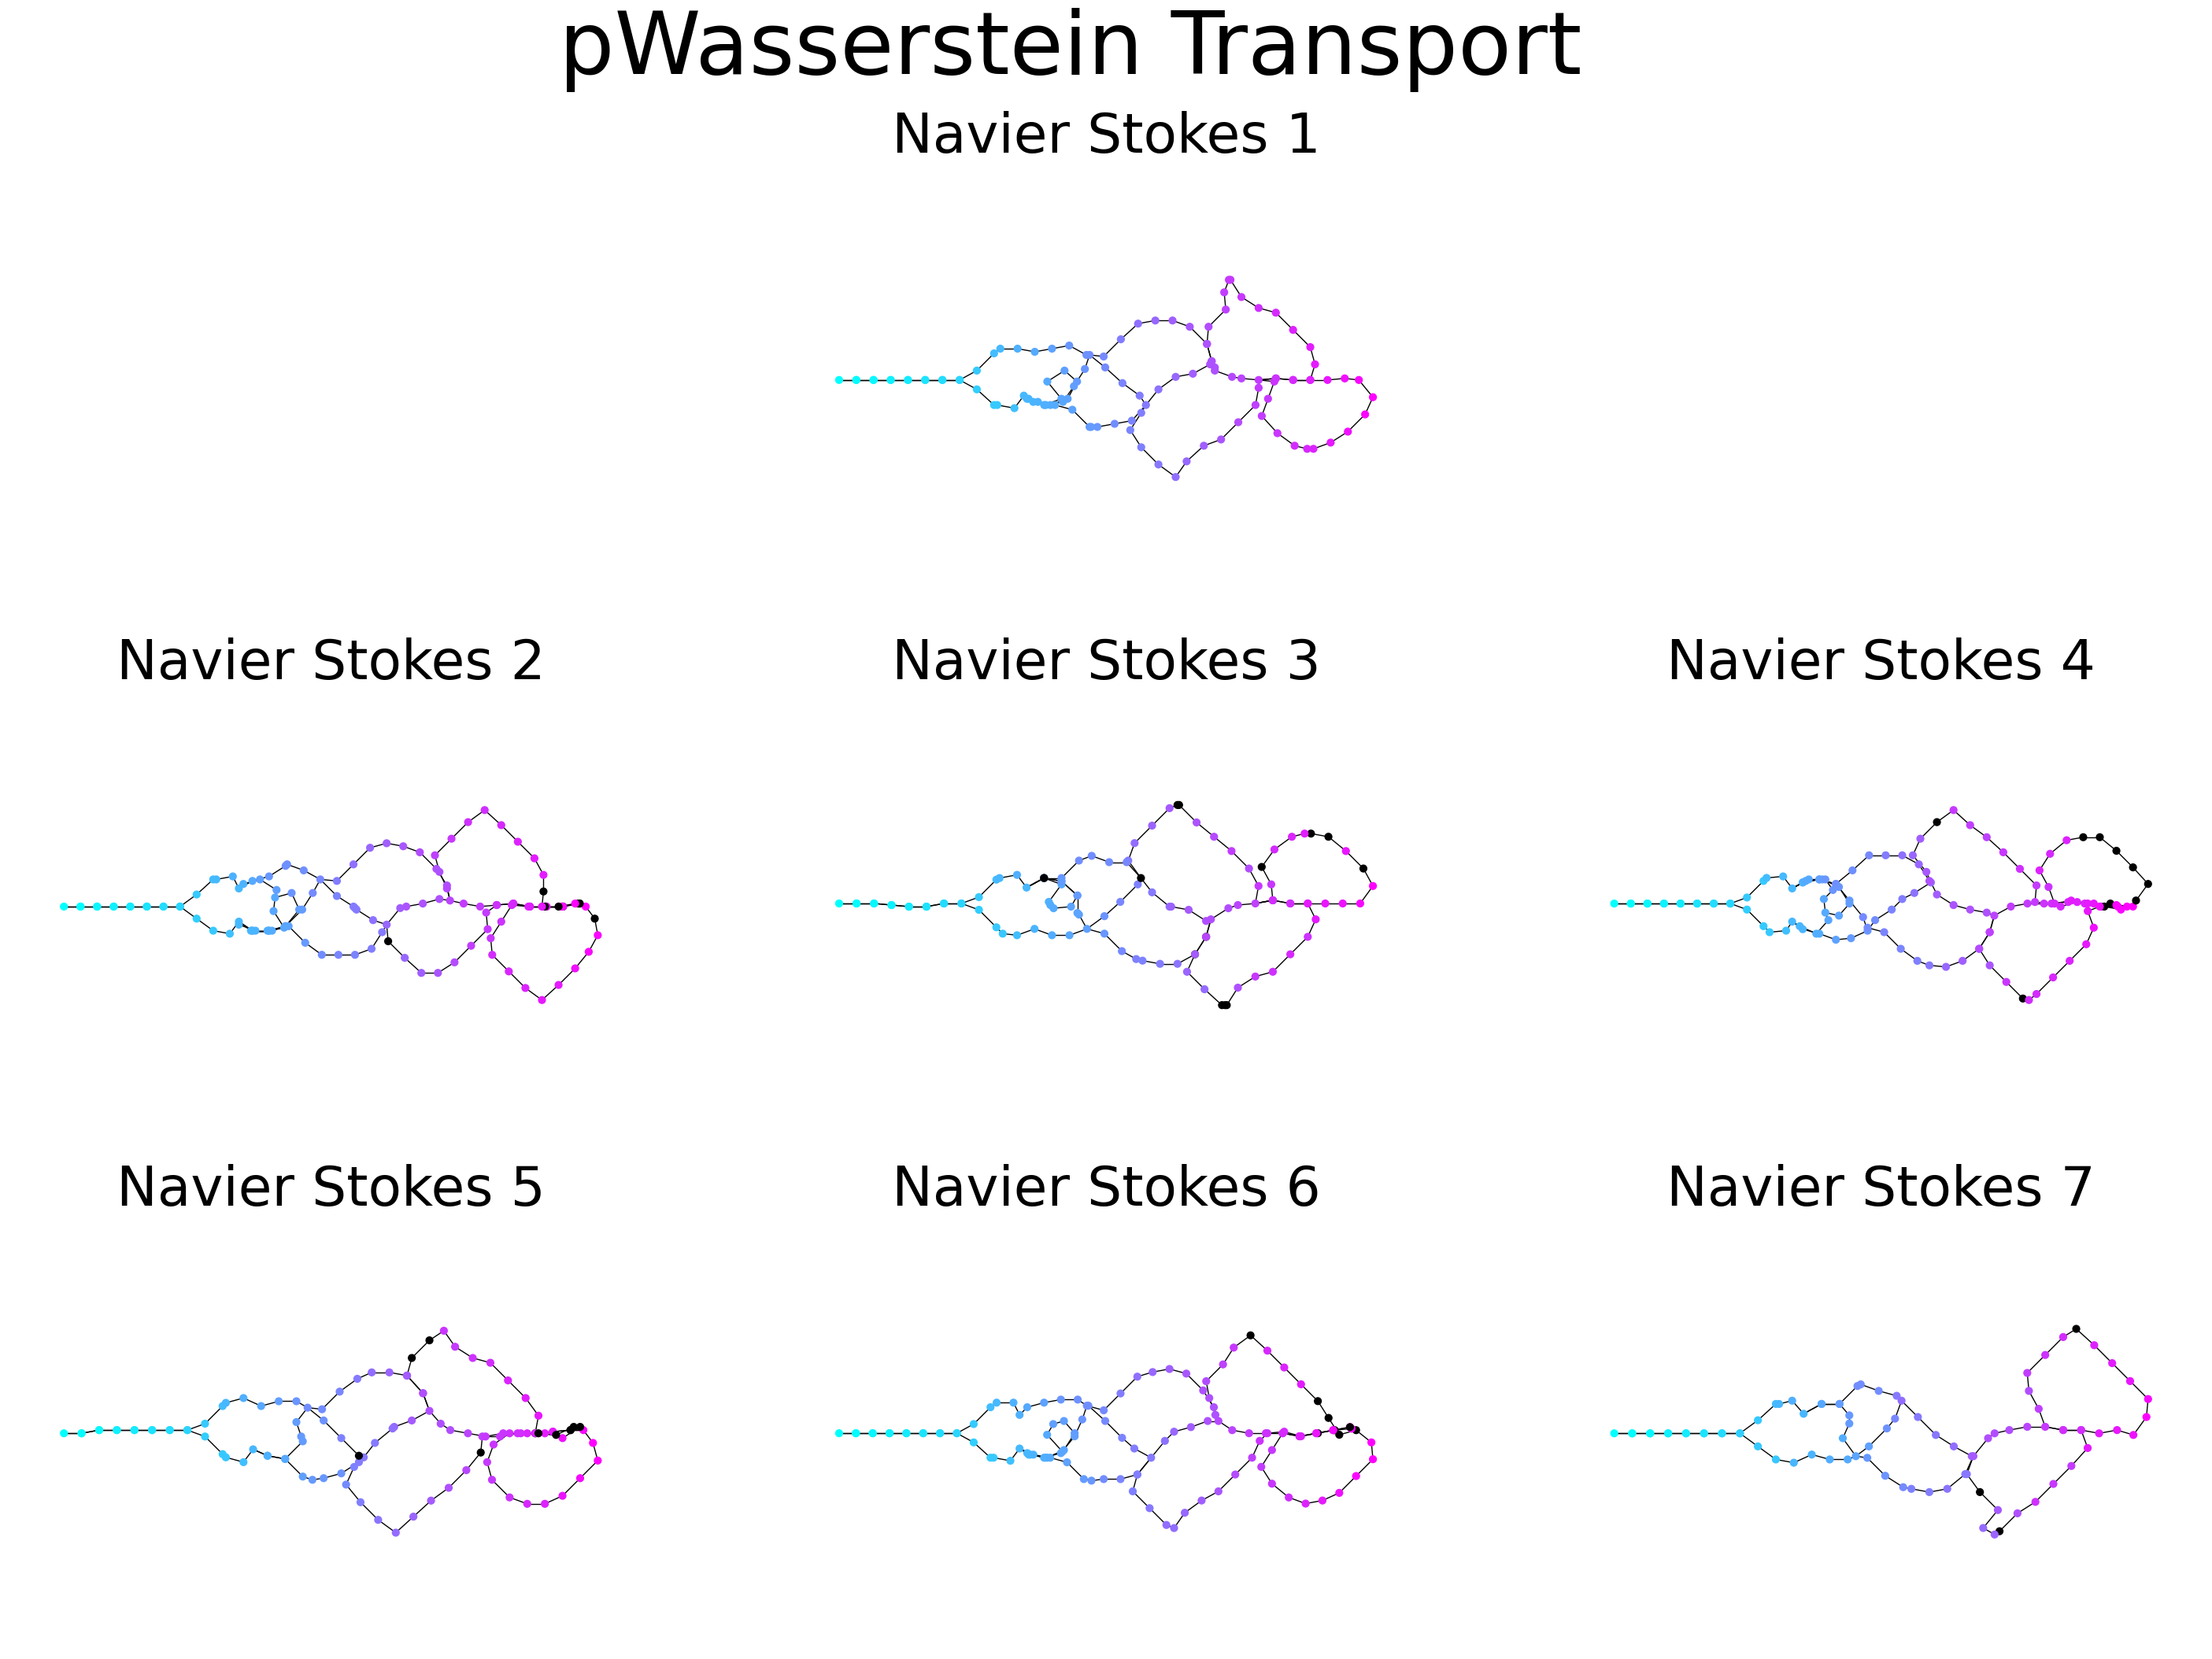

In [86]:
fig = draw_graphs(pw_couplings)
fig.suptitle('pWasserstein Transport', fontsize=80)

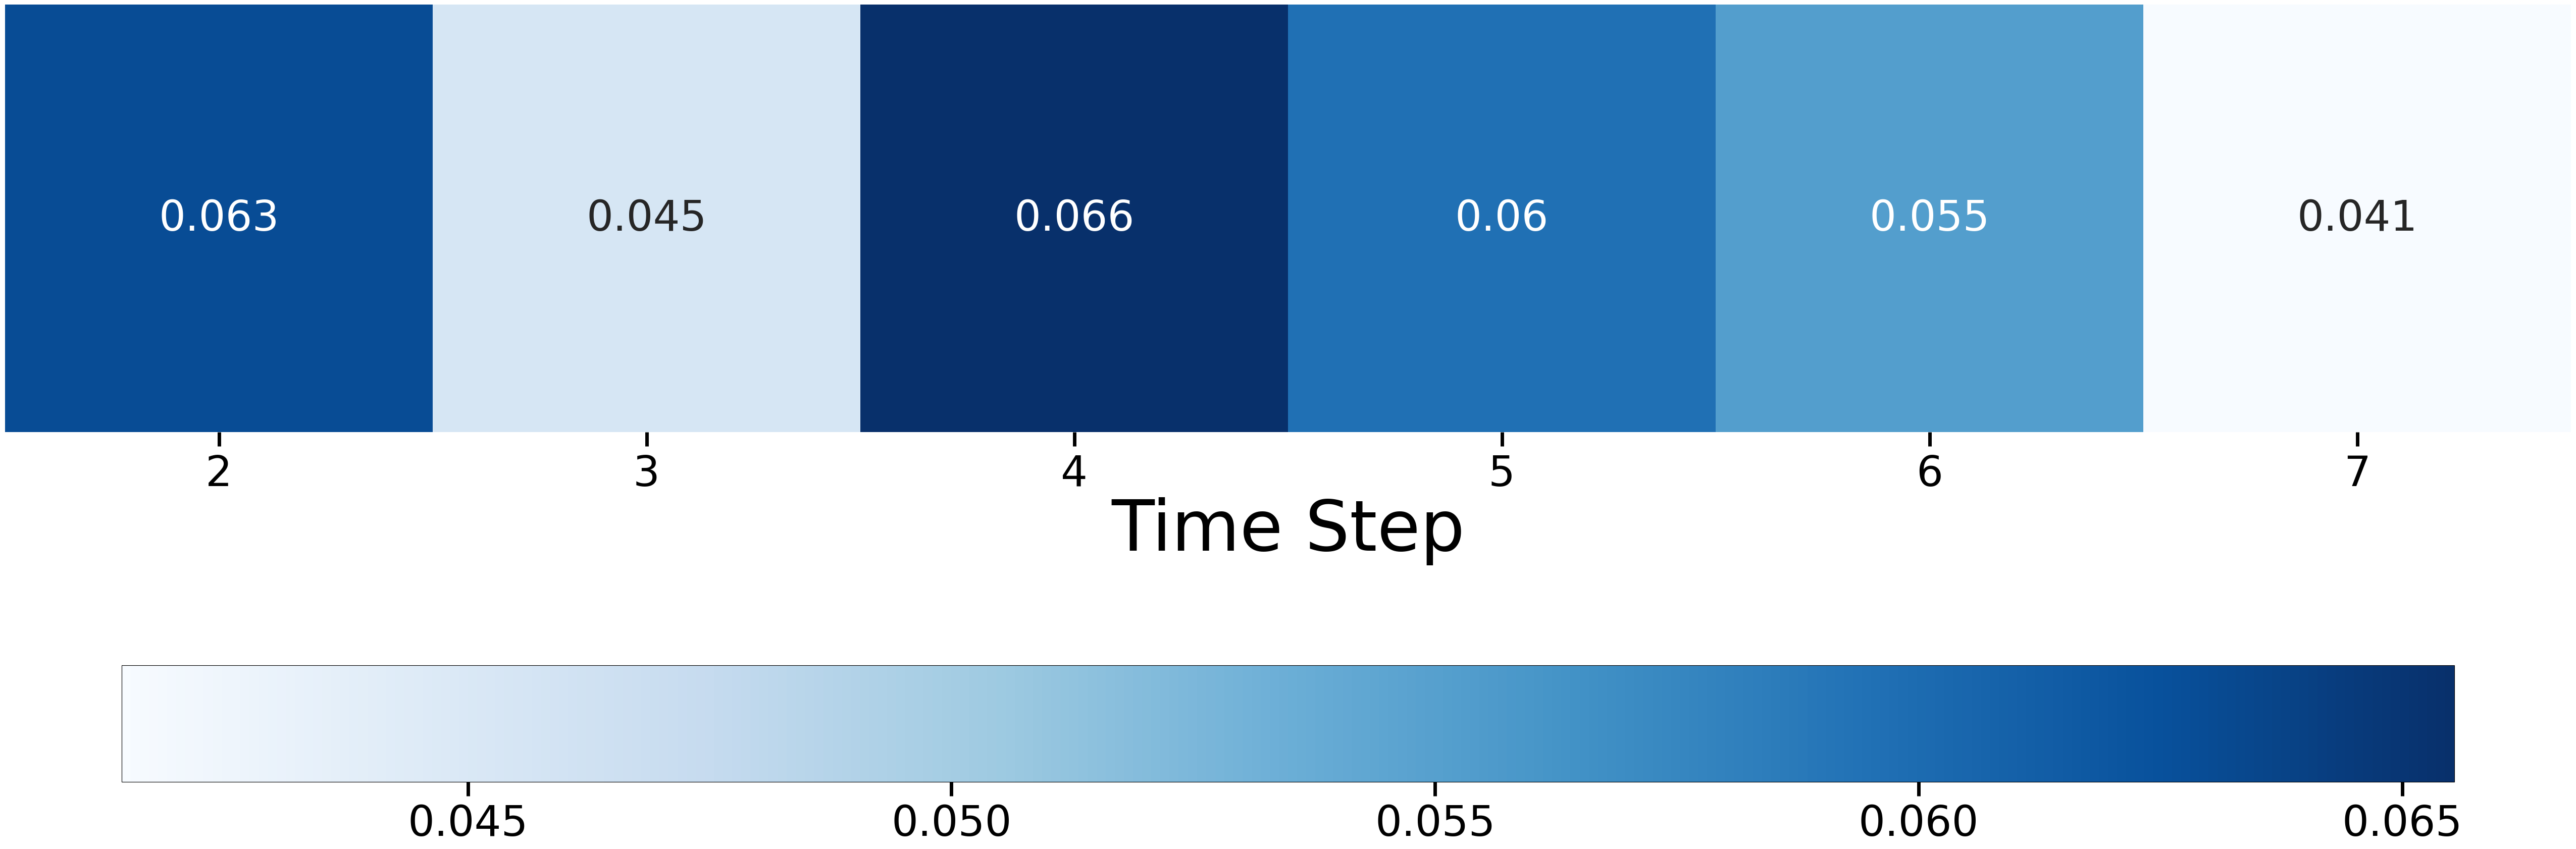

In [87]:
plot_distance_heatmap(pw_distances);

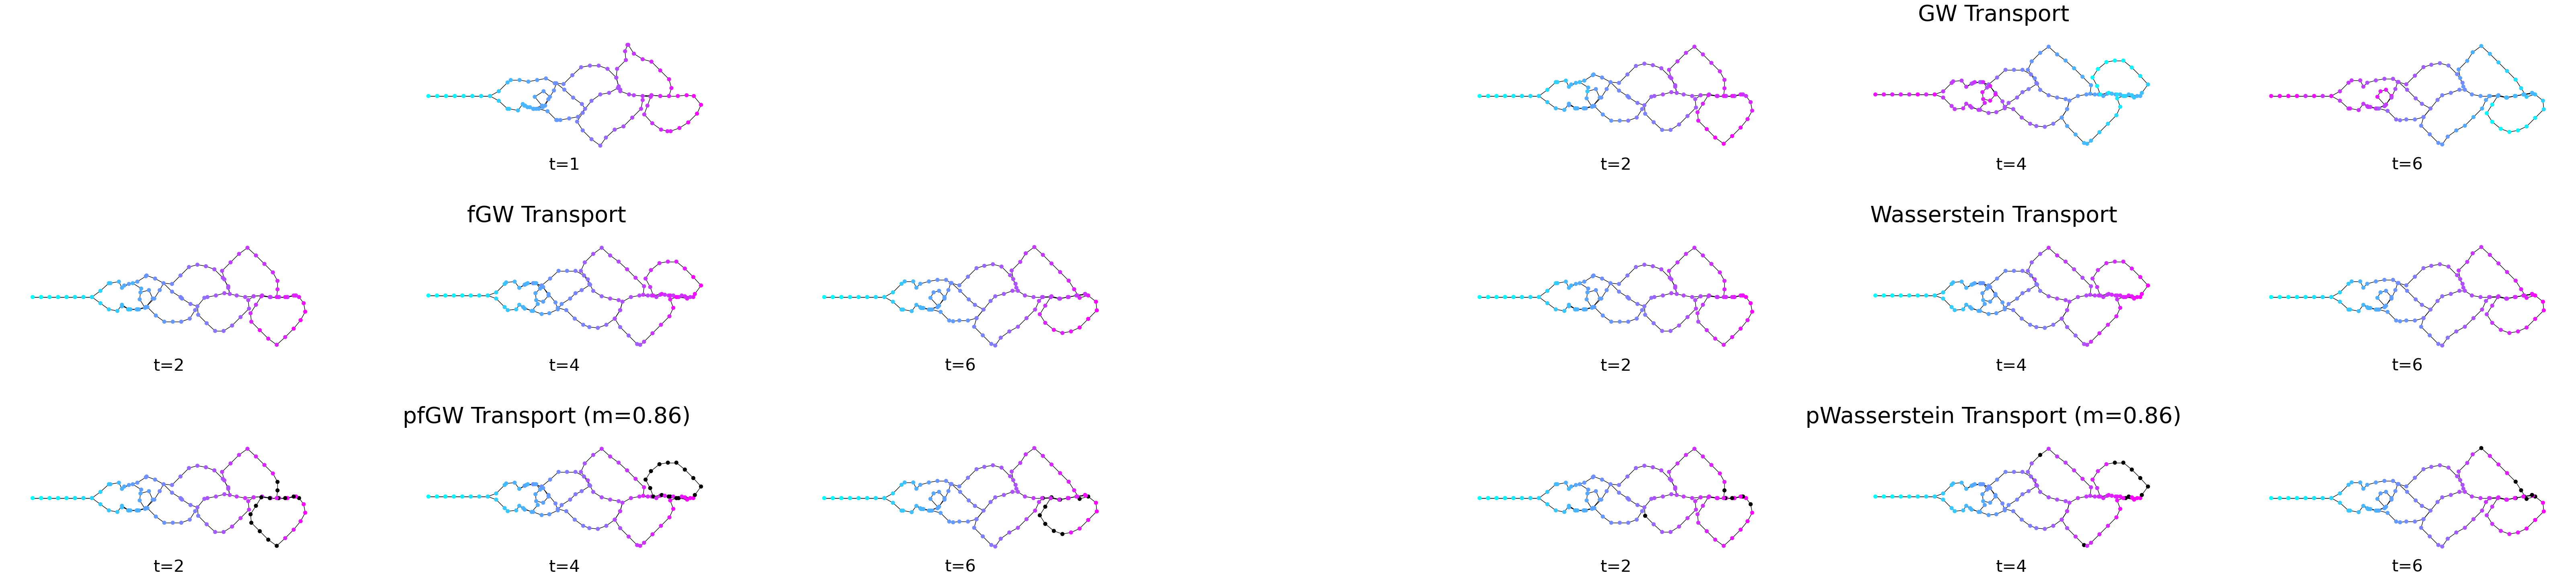

In [94]:
fig = plt.figure(figsize=(2 * 3 * 12, 3 * 5))

ts = [2, 4, 6]

src_fig, gw_fig, fgw_fig, w_fig, pfgw_fig, pw_fig = fig.subfigures(3, 2, hspace=0.9).ravel()

src_axes = src_fig.subplots(1, 3, subplot_kw=dict())
for ax in src_axes: ax.set_axis_off()
src_ax = src_axes[1]
src_node_color = src_graph.node_color_by_position()
src_graph.draw(
  ax = src_ax,
  cmap = 'cool',
)
src_ax.set_title(f't={src_t}', y=0, fontsize=30)

gw_axes = gw_fig.subplots(1, 3, subplot_kw=dict())
gw_fig.suptitle('GW Transport', y=0.95, fontsize=40)
for t, ax in zip(ts, gw_axes):
  dest = dest_graphs[t]

  dest.draw(
    ax = ax,
    cmap = 'cool',
    node_color = dest.node_color_by_coupling(src_node_color, gw_couplings[t]),
  )
  ax.set_title(f't={t}', y=0, fontsize=30)
  
fgw_axes = fgw_fig.subplots(1, 3, subplot_kw=dict())
fgw_fig.suptitle('fGW Transport', y=0.95, fontsize=40)
for t, ax in zip(ts, fgw_axes):
  dest = dest_graphs[t]

  dest.draw(
    ax = ax,
    cmap = 'cool',
    node_color = dest.node_color_by_coupling(src_node_color, fgw_couplings[t]),
  )
  ax.set_title(f't={t}', y=0, fontsize=30)
  
w_axes = w_fig.subplots(1, 3, subplot_kw=dict())
w_fig.suptitle('Wasserstein Transport', y=0.95, fontsize=40)
for t, ax in zip(ts, w_axes):
  dest = dest_graphs[t]

  dest.draw(
    ax = ax,
    cmap = 'cool',
    node_color = dest.node_color_by_coupling(src_node_color, w_couplings[t]),
  )
  ax.set_title(f't={t}', y=0, fontsize=30)

pfgw_axes = pfgw_fig.subplots(1, 3, subplot_kw=dict())
pfgw_fig.suptitle(f'pfGW Transport (m={m_pfgw:1.2f})', y=0.95, fontsize=40)
for t, ax in zip(ts, pfgw_axes):
  ax.set_facecolor('m')
  dest = dest_graphs[t]

  dest.draw(
    ax = ax,
    cmap = 'cool',
    node_color = dest.node_color_by_coupling(src_node_color, pfgw_couplings[t]),
  )
  ax.set_title(f't={t}', y=0, fontsize=30)
  
pw_axes = pw_fig.subplots(1, 3, subplot_kw=dict())
pw_fig.suptitle(f'pWasserstein Transport (m={m_pfgw:1.2f})', y=0.95, fontsize=40)
for t, ax in zip(ts, pw_axes):
  dest = dest_graphs[t]

  dest.draw(
    ax = ax,
    cmap = 'cool',
    node_color = dest.node_color_by_coupling(src_node_color, pw_couplings[t]),
  )
  ax.set_title(f't={t}', y=0, fontsize=30)